# Deep Lerning Practioner Pod - Capstone Project

## Pre-work Assignment
For this assignment, you will:
- Load and visualize a standard MNIST dataset using Keras datasets library.
- Build a simple neural network model to classify the digits.

Use the following parameters for this assignment:
1.     Sigmoid transfer function for hidden layer
2.     Softmax activation function for the output layer
3.     Categorical cross entropy as loss function
4.     Stochastic Gradient Descent (SGD) as the optimization algorithm
5.     Number of layer = 2 (one hidden layer and one output layer)
6.     Number of nodes per layer = 8
7.     Batch size = 128, epochs = 5 

In [34]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import tensorflow as tf
import random as python_random
os.environ["PYTHONHASHSEED"]="0"
np.random.seed(123)
python_random.seed(123)
tf.random.set_random_seed(123)

### Load and visualize a standard MNIST dataset using Keras datasets library

In [4]:
# load data set and train/test split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

60000 train samples
10000 test samples


In [6]:
y_test[0]

7

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


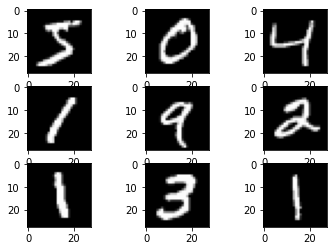

In [8]:
# visualise data

# print shape of loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


### Build a simple neural network model to classify the digits

In [9]:
# parameters
num_classes = 10
input_shape = x_train.shape[1:]
num_nodes = 8
batch_size = 128
epochs = 5

In [10]:
# scale images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [11]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# build model

model_prework = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_nodes, activation="sigmoid"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_prework.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train model

model_prework.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

model_prework.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 17us/sample - loss: 2.2904 - acc: 0.1775 - val_loss: 2.1866 - val_acc: 0.2902
Epoch 2/5
54000/54000 [==============================] - 1s 13us/sample - loss: 2.1223 - acc: 0.4008 - val_loss: 2.0398 - val_acc: 0.5120
Epoch 3/5
54000/54000 [==============================] - 1s 13us/sample - loss: 1.9835 - acc: 0.5593 - val_loss: 1.8992 - val_acc: 0.6382
Epoch 4/5
54000/54000 [==============================] - 1s 13us/sample - loss: 1.8516 - acc: 0.6406 - val_loss: 1.7655 - val_acc: 0.6875
Epoch 5/5
54000/54000 [==============================] - 1s 11us/sample - loss: 1.7275 - acc: 0.6662 - val_loss: 1.6411 - val_acc: 0.7075


In [14]:
# evaluate model
train_score = model_prework.evaluate(x_train, y_train, verbose=0)
print("Train loss:", train_score[0])
print("Train accuracy:", train_score[1])
test_score = model_prework.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_score[0])
print("Test accuracy:", test_score[1])

Train loss: 1.6656711981455485
Train accuracy: 0.6788333
Test loss: 1.6568887832641601
Test accuracy: 0.6891


### Results
- Train loss: 1.5854114313761394
- Train accuracy: 0.665
- Test loss: 1.5797919673919678
- Test accuracy: 0.6693

## Part 1 - Team Member 1 (Fully Connected NN) - Directions

Classify the digits using a fully connected neural network architecture. 

Part 1 consists of 6 tasks. Before the implementation of each task, add a hypothesis Markdown cell in your Jupyter Notebook documenting the expected result for that task. Be sure to synch up with your partner to make sure your hypothesis and the structure of your notebooks are consistent.

Note: Tasks 1-5 should be completed and a debrief conducted with the entire class before continuing on with Task 6.
 
#### Fixed parameters
For the purposes of consistency, the following parameters are fixed for Task 1-3.
- Sigmoid transfer function for hidden layers
- Softmax activation function for the output layer
- Categorical cross entropy as loss function
- Stochastic Gradient Descent (SGD) as the optimization algorithm
 
#### Tunable parameters
The following parameters are tunable for Tasks 1-3.
- Number of layers
- Number of nodes in each layer
- Number of training epochs to be run*
- Batch size for each epoch*
 
*For Task 1 and Task 2, cases 1, 3 and 4 set training epochs to 5 and a fixed batch size of 128.  For case 2, you can vary the number of epochs.

In [15]:
# fixed parameters
hidden_layer_activation = "sigmoid"
output_layer_activation = "softmax"
loss = "categorical_crossentropy"
optimizer = "SGD"

### Task 1: Execute a simple, fully-connected, neural network architecture with a single hidden layer with 32 nodes. After training and evaluating the network, document the quality metrics and findings in your Jupyter Notebook. 

In [16]:
# tunable parameters
num_nodes = 32
epochs = 5
batch_size = 128

In [17]:
# build model

model_task_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_nodes, activation=hidden_layer_activation),
        layers.Dense(num_classes, activation=output_layer_activation),
    ]
)

model_task_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [18]:
# train model

model_task_1.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

model_task_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 20us/sample - loss: 2.1272 - acc: 0.4075 - val_loss: 1.9194 - val_acc: 0.6710
Epoch 2/5
54000/54000 [==============================] - 1s 18us/sample - loss: 1.7747 - acc: 0.6759 - val_loss: 1.5946 - val_acc: 0.7645
Epoch 3/5
54000/54000 [==============================] - 1s 13us/sample - loss: 1.4937 - acc: 0.7358 - val_loss: 1.3334 - val_acc: 0.8022
Epoch 4/5
54000/54000 [==============================] - 1s 13us/sample - loss: 1.2742 - acc: 0.7705 - val_loss: 1.1335 - val_acc: 0.8290
Epoch 5/5
54000/54000 [==============================] - 1s 13us/sample - loss: 1.1073 - acc: 0.7944 - val_loss: 0.9820 - val_acc: 0.8435


In [19]:
# evaluate model
train_score = model_task_1.evaluate(x_train, y_train, verbose=0)
print("Train loss:", train_score[0])
print("Train accuracy:", train_score[1])
test_score = model_task_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_score[0])
print("Test accuracy:", test_score[1])

Train loss: 1.0325027344385782
Train accuracy: 0.8064833
Test loss: 1.0185466941833496
Test accuracy: 0.8129


#### Results and findings - Task 1
The model performance could be improved with train accuracy of 80,6% and test accuracy of 81,3%.
However, the model doesn't seem to suffer from overfitting as test accuracy is even higher than training accuracy.
Possibly, the model architecture is not sophisticated enough for the problem at hand.

### Task 2: Task 2 consists of 4 cases, where you are supposed to change the tunable parameters. 

After training and evaluating the network, document the quality metrics for each case and include the findings in your Jupyter Notebook.

- Case 1: Deep networks (e.g., different number of hidden layers while keeping nodes constant); use 32 nodes so results are comparable with Task 1 results.
- Case 2: Leave the deep network to train for a longer time. How long should you train it for? And why? Compare the results with results from previous network training.
- Case 3: A single layer network (1 hidden layer) and increasing the number of nodes in the layer
- Case 4: Adding more nodes and more layers

HINT for Task 2:  To make your coding easy and presentable, create two functions: 
create_dense() - a function that takes an array of sizes for the hidden layers as an argument. Creates a multi-layer perceptron that always has appropriate input and output layers for the MNIST task
evaluate() - a function that prints a summary of the model, trains the model, graphs the training and validation accuracy, and prints a summary of its performance on the test data           


In [97]:
def create_dense(hidden_layers=[], hidden_layer_kernel_initializer='glorot_uniform', dropout = None):
    
    # input layer
    inputs = keras.Input(shape=input_shape)
    x = layers.Flatten()(inputs)
    
    # hidden layers
    for num_nodes in hidden_layers:
        x = layers.Dense(num_nodes, activation=hidden_layer_activation, kernel_initializer=hidden_layer_kernel_initializer)(x)
        # add dropout layer if dropout is specified
        if dropout:
            x = layers.Dropout(rate=dropout)(x)
        
    # output layer
    outputs = layers.Dense(num_classes, activation=output_layer_activation)(x)
    
    # define tmodel
    model = keras.Model(inputs, outputs)
    return model

In [144]:
def evaluate(model, epochs, batch_size=128, lr=None):
    
    # print summary
    print(model.summary())
    
    # initialize optimizer with learning rate if specified
    if lr:
        _optimizer = keras.optimizers.SGD(learning_rate=lr)
    else:
        _optimizer = optimizer
        
    # train model
    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    
    # graph training and validation accuracy
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # print summary of performance on test data
    test_score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", test_score[0])
    print("Test accuracy:", test_score[1])
    
    
    return {
        "test loss": test_score[0],
        "test accuracy": test_score[1],
        "train loss": history.history['loss'][-1],
        "train accuracy": history.history['acc'][-1],
        "val loss": history.history['val_loss'][-1],
        "val accuracy": history.history['val_acc'][-1]
    }
    

#### Case 1: Deep networks (e.g., different number of hidden layers while keeping nodes constant); use 32 nodes so results are comparable with Task 1 results.

Test network performance on different numbers of hidden layers:
- 1
- 2
- 3
- 4
- 5
- 10
- 20

In [70]:
num_hidden_layers = [1, 2, 3, 4, 5, 10, 20]
models = []
performances = []

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_372 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_373 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 41us/sample - loss: 2.1408 - acc: 0.4088 - val_loss: 1.9508 - val_acc: 0.6708
Epoch 2/5
54000/54000 [==============================] - 1s 

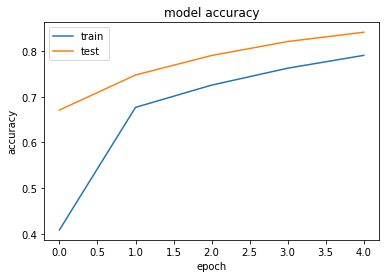

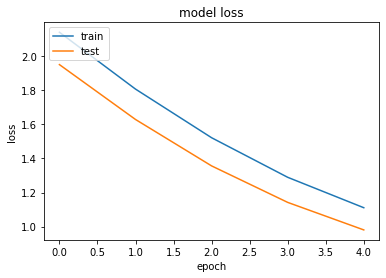

Test loss: 1.0131804950714112
Test accuracy: 0.8134
Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_374 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_375 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_376 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
5400

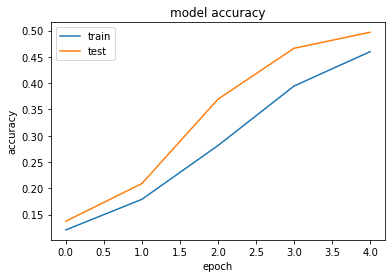

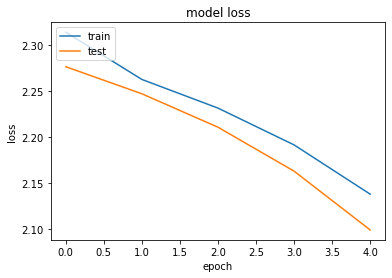

Test loss: 2.0988534545898436
Test accuracy: 0.4838
Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_377 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_378 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_379 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_380 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
__

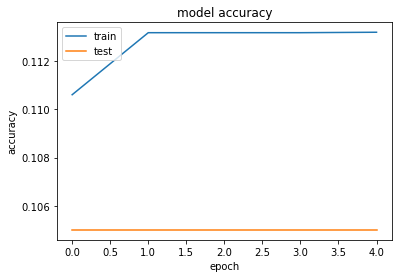

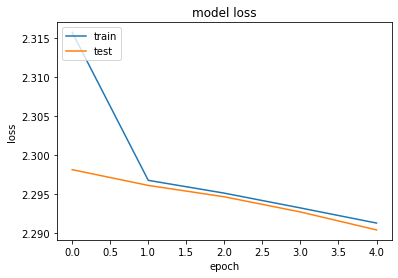

Test loss: 2.289863235473633
Test accuracy: 0.1135
Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_381 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_382 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_383 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_384 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_3

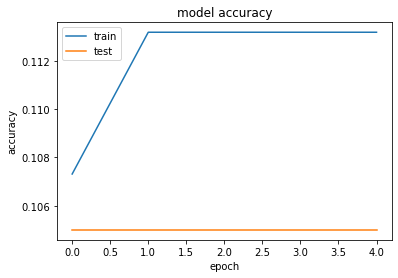

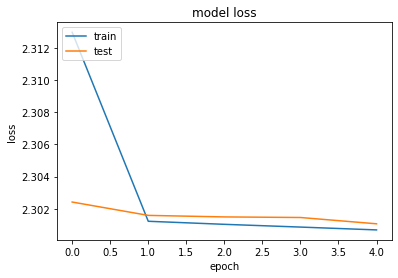

Test loss: 2.3003235542297364
Test accuracy: 0.1135
Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_386 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_387 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_388 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_389 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_

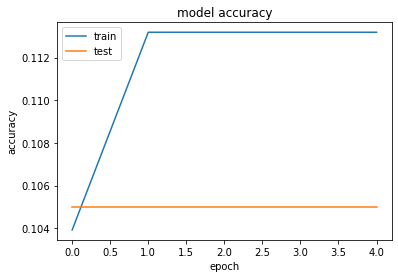

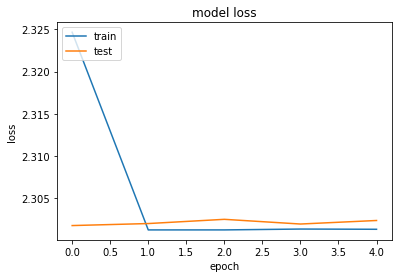

Test loss: 2.300960136413574
Test accuracy: 0.1135
Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_392 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_393 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_394 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_395 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_3

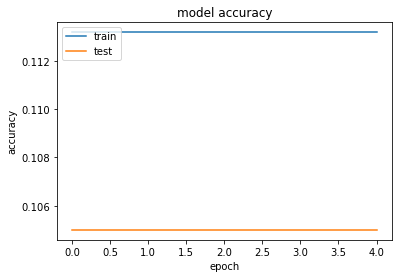

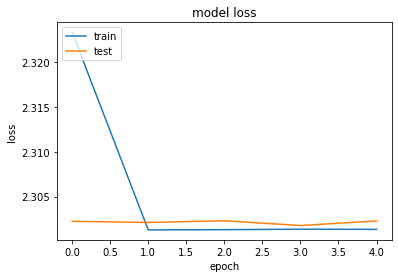

Test loss: 2.3009382984161375
Test accuracy: 0.1135
Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_39 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_403 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_404 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_405 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_406 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_

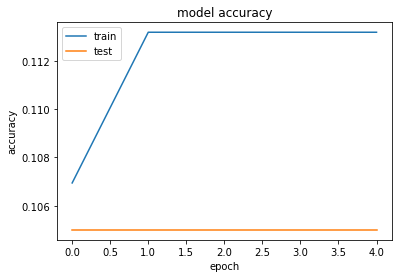

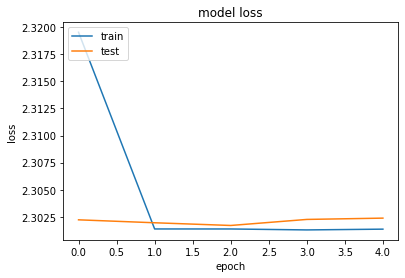

Test loss: 2.3010429306030273
Test accuracy: 0.1135


In [71]:
for hidden_layer_count in num_hidden_layers:
    model = create_dense([num_nodes]*hidden_layer_count)
    performance = evaluate(model, epochs=epochs)
    models.append(model)
    performances.append(performance)

Compare network performance on different numbers of hidden layers:

In [72]:
# show model performance per number of hidden layers in table
for i, performance in enumerate(performances):
    performance['number of hidden layers'] = num_hidden_layers[i]
pd.DataFrame(performances)

,test loss,test accuracy,train loss,train accuracy,val loss,val accuracy,number of hidden layers
0,1.013180,0.8134,1.110963,0.790444,0.980695,0.841000,1
1,2.098853,0.4838,2.138175,0.459926,2.099377,0.496833,2
2,2.289863,0.1135,2.291312,0.113204,2.290435,0.105000,3
3,2.300324,0.1135,2.300680,0.113185,2.301060,0.105000,4
4,2.300960,0.1135,2.301332,0.113185,2.302373,0.105000,5
5,2.300938,0.1135,2.301341,0.113185,2.302282,0.105000,10
6,2.301043,0.1135,2.301364,0.113185,2.302381,0.105000,20


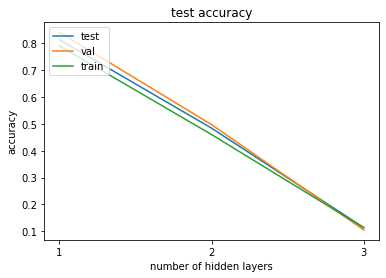

In [73]:
# plot model performance per number of hidden layers for first 3 tests 
# (model performance remains the same from 3 layers onwards)
plt.plot([count for count in num_hidden_layers][:3],[p['test accuracy'] for p in performances][:3])
plt.plot([count for count in num_hidden_layers][:3],[p['val accuracy'] for p in performances][:3])
plt.plot([count for count in num_hidden_layers][:3],[p['train accuracy'] for p in performances][:3])
plt.xticks(ticks=[count for count in num_hidden_layers][:3])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of hidden layers')
plt.legend(['test', 'val', 'train'], loc='upper left')
plt.show()

##### Results and findings - Task 2 / Case 1
Increasing the number of hidden layers does not improve model performance on any data set. A deep fully connected network architecture does not seem to be very suitable for the handwritten digit recognition task. However, we might need a higher number of epochs in order to train a deeper neural network, although training performance looks pretty stable from the second epoch onwards.

#### Case 2: Leave the deep network to train for a longer time. How long should you train it for? And why? Compare the results with results from previous network training.

See whether deep neural network (20 hidden layers) improves with longer training time (higher number of epochs)

In [77]:
hidden_layer_count = 20

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_42 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_466 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_467 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_468 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_469 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_470 (Dense)            (None, 32)                105

Epoch 35/100
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 36/100
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 37/100
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 38/100
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 39/100
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 40/100
54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 41/100
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 42/100


54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 94/100
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 95/100
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 96/100
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 97/100
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 98/100
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 99/100
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 100/100
54000/54000 

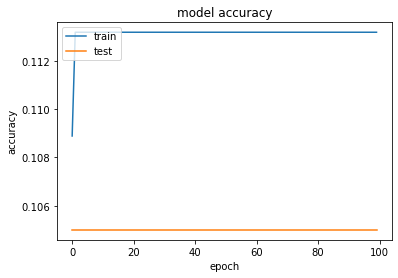

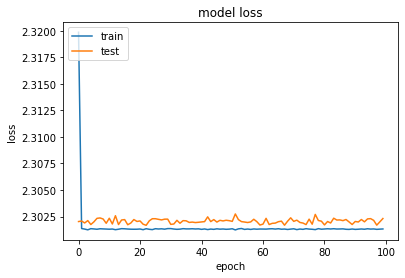

Test loss: 2.3011014320373535
Test accuracy: 0.1135


In [76]:
model_20 = create_dense([num_nodes]*hidden_layer_count)
performance = evaluate(model_20, epochs=100)

As observed during training for case 1, training performance doesn't improve after second epoch.

Try again for a shallower deep neural network (3 hidden layers)

Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_558 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_559 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_560 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_561 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
______________________________________________________

54000/54000 [==============================] - 2s 30us/sample - loss: 0.8786 - acc: 0.7619 - val_loss: 0.8084 - val_acc: 0.7913
Epoch 51/100
54000/54000 [==============================] - 2s 30us/sample - loss: 0.8535 - acc: 0.7684 - val_loss: 0.7832 - val_acc: 0.8030
Epoch 52/100
54000/54000 [==============================] - 2s 30us/sample - loss: 0.8298 - acc: 0.7765 - val_loss: 0.7593 - val_acc: 0.8062
Epoch 53/100
54000/54000 [==============================] - 2s 30us/sample - loss: 0.8074 - acc: 0.7820 - val_loss: 0.7366 - val_acc: 0.8147
Epoch 54/100
54000/54000 [==============================] - 2s 30us/sample - loss: 0.7862 - acc: 0.7888 - val_loss: 0.7157 - val_acc: 0.8202
Epoch 55/100
54000/54000 [==============================] - 2s 30us/sample - loss: 0.7663 - acc: 0.7946 - val_loss: 0.6956 - val_acc: 0.8252
Epoch 56/100
54000/54000 [==============================] - 2s 37us/sample - loss: 0.7473 - acc: 0.7995 - val_loss: 0.6766 - val_acc: 0.8302
Epoch 57/100
54000/54000 [

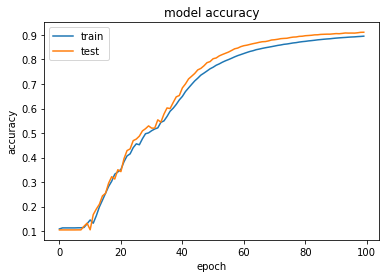

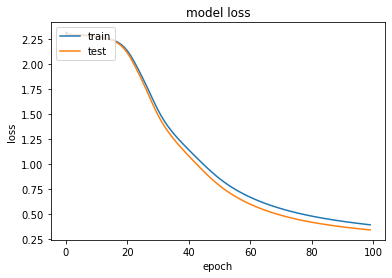

Test loss: 0.3752809628009796
Test accuracy: 0.8993


In [93]:
hidden_layer_count = 3
model_3 = create_dense([num_nodes]*hidden_layer_count)
performance = evaluate(model_3, epochs=100)

At first, training performance doesn't improve after second epoch as observed during training for case 1. But from epoch 10 onwards the model performance starts to increase slowly with high increases between epoch 14 and 30. We actuallly obtain highest test accuracy observed so far.

As model performance still seems to be improving at epoch 100, let's try to train even a bit longer.

Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_558 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_559 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_560 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_561 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
______________________________________________________

54000/54000 [==============================] - 2s 35us/sample - loss: 0.2710 - acc: 0.9250 - val_loss: 0.2370 - val_acc: 0.9405
Epoch 51/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2693 - acc: 0.9256 - val_loss: 0.2353 - val_acc: 0.9398
Epoch 52/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2676 - acc: 0.9260 - val_loss: 0.2339 - val_acc: 0.9400
Epoch 53/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2660 - acc: 0.9262 - val_loss: 0.2328 - val_acc: 0.9407
Epoch 54/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.2643 - acc: 0.9265 - val_loss: 0.2313 - val_acc: 0.9407
Epoch 55/200
54000/54000 [==============================] - 2s 35us/sample - loss: 0.2627 - acc: 0.9270 - val_loss: 0.2302 - val_acc: 0.9415
Epoch 56/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2611 - acc: 0.9275 - val_loss: 0.2285 - val_acc: 0.9413
Epoch 57/200
54000/54000 [

54000/54000 [==============================] - 2s 30us/sample - loss: 0.1989 - acc: 0.9442 - val_loss: 0.1788 - val_acc: 0.9523
Epoch 109/200
54000/54000 [==============================] - 2s 30us/sample - loss: 0.1981 - acc: 0.9442 - val_loss: 0.1784 - val_acc: 0.9522
Epoch 110/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.1972 - acc: 0.9448 - val_loss: 0.1774 - val_acc: 0.9527
Epoch 111/200
54000/54000 [==============================] - 2s 37us/sample - loss: 0.1964 - acc: 0.9447 - val_loss: 0.1772 - val_acc: 0.9522
Epoch 112/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.1954 - acc: 0.9451 - val_loss: 0.1761 - val_acc: 0.9522
Epoch 113/200
54000/54000 [==============================] - 2s 35us/sample - loss: 0.1947 - acc: 0.9452 - val_loss: 0.1755 - val_acc: 0.9527
Epoch 114/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.1938 - acc: 0.9456 - val_loss: 0.1748 - val_acc: 0.9523
Epoch 115/200
54000/

Epoch 166/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.1594 - acc: 0.9553 - val_loss: 0.1517 - val_acc: 0.9570
Epoch 167/200
54000/54000 [==============================] - 2s 40us/sample - loss: 0.1589 - acc: 0.9554 - val_loss: 0.1514 - val_acc: 0.9572
Epoch 168/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.1583 - acc: 0.9554 - val_loss: 0.1518 - val_acc: 0.9578
Epoch 169/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.1579 - acc: 0.9554 - val_loss: 0.1510 - val_acc: 0.9582
Epoch 170/200
54000/54000 [==============================] - 2s 31us/sample - loss: 0.1573 - acc: 0.9559 - val_loss: 0.1509 - val_acc: 0.9580
Epoch 171/200
54000/54000 [==============================] - 2s 31us/sample - loss: 0.1568 - acc: 0.9560 - val_loss: 0.1499 - val_acc: 0.9585
Epoch 172/200
54000/54000 [==============================] - 2s 30us/sample - loss: 0.1563 - acc: 0.9560 - val_loss: 0.1497 - val_acc: 0.9575
Epoch 

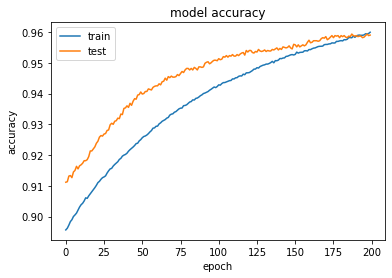

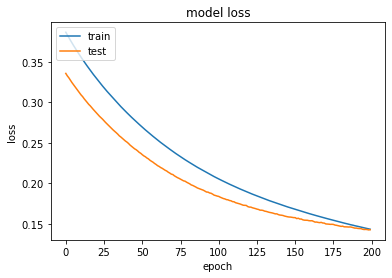

Test loss: 0.17028602278083563
Test accuracy: 0.9496


In [94]:
performance = evaluate(model_3, epochs=200)

Both train and validation accuracy increase until epoch 100 + 175, around where they seem to stagnate around 0.956 and 0.958 respectively.

Since training longer eventually helped with the 3 hidden layer model, let's also try training the deep neural network (20 hidden layers) for a bit longer (1000 epochs).

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_44 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_491 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_492 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_493 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_494 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_495 (Dense)            (None, 32)                105

54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 35/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 36/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 37/1000
54000/54000 [==============================] - 3s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 38/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 39/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 40/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 41/1000
54000/

Epoch 92/1000
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 93/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 94/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 95/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 96/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 97/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 98/1000
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 

54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 150/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 151/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 152/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 153/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 154/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 155/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 156/1000

54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 207/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 208/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 209/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 210/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 211/1000
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 212/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 213/1000

54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 264/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 265/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 266/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 267/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 268/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 269/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 270/1000

54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 321/1000
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 322/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 323/1000
54000/54000 [==============================] - 3s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 324/1000
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 325/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 326/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 327/1000

54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 378/1000
54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 379/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 380/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 381/1000
54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 382/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 383/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 384/1000

54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 435/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 436/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 437/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 438/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 439/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 440/1000
54000/54000 [==============================] - 5s 86us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 441/1000

54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 492/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 493/1000
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 494/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 495/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 496/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 497/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 498/1000

54000/54000 [==============================] - 5s 86us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 549/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 550/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 551/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 552/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 553/1000
54000/54000 [==============================] - 4s 81us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 554/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 555/1000

54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 606/1000
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 607/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 608/1000
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 609/1000
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 610/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 611/1000
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 612/1000

54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 663/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 664/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 665/1000
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 666/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 667/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 668/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 669/1000

54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 720/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 721/1000
54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 722/1000
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 723/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 724/1000
54000/54000 [==============================] - 4s 73us/sample - loss: 2.3012 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 725/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 726/1000

54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 777/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 778/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 779/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 780/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 781/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 782/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 783/1000

54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 834/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 835/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 836/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 837/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 838/1000
54000/54000 [==============================] - 5s 84us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 839/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 840/1000

54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 891/1000
54000/54000 [==============================] - 3s 65us/sample - loss: 2.3012 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 892/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 893/1000
54000/54000 [==============================] - 3s 62us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 894/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 895/1000
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 896/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 897/1000

54000/54000 [==============================] - 5s 91us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 948/1000
54000/54000 [==============================] - 5s 85us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 949/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 950/1000
54000/54000 [==============================] - 5s 93us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 951/1000
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 952/1000
54000/54000 [==============================] - 5s 89us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 953/1000
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 954/1000

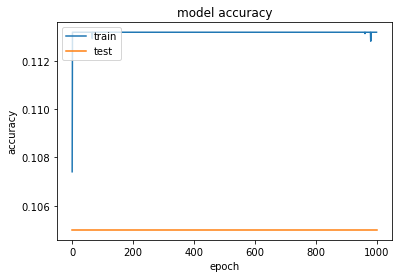

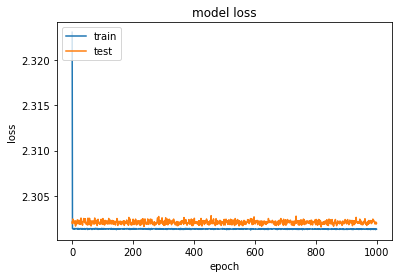

Test loss: 2.3010562980651854
Test accuracy: 0.1135


In [80]:
hidden_layer_count = 20
performance = evaluate(model_20, epochs=900)

Even with a 10 times longer training time, the deep neural network doesn't improve its performance. It could be a problem of vanishing gradients/weight initialization.

In [86]:
model_20.get_layer(index = 2).kernel_initializer

Standard kernel initiallizer for dense layers is 'glorot_uniform', which is actually recommended for sigmoid activation functions (https://medium.com/@sakeshpusuluri123/activation-functions-and-weight-initialization-in-deep-learning-ebc326e62a5c). We could try the 'glorot_normal' version of the Xavier Glorot initialization.

Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_533 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_534 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_535 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_536 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_537 (Dense)            (None, 32)                105

54000/54000 [==============================] - 4s 70us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 35/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 36/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 37/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 38/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 39/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 40/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 41/1000
54000/

Epoch 92/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 93/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 94/1000
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 95/1000
54000/54000 [==============================] - 3s 63us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 96/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 97/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 98/1000
54000/54000 [==============================] - 3s 63us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 

54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 150/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 151/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 152/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 153/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 154/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 155/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 156/1000

54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 207/1000
54000/54000 [==============================] - 3s 62us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 208/1000
54000/54000 [==============================] - 3s 63us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 209/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 210/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 211/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 212/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 213/1000

54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 264/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 265/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 266/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 267/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 268/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 269/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 270/1000

54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 321/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 322/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 323/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 324/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 325/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 326/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 327/1000

54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 378/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 379/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 380/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 381/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 382/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 383/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 384/1000

54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 435/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 436/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 437/1000
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 438/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 439/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 440/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 441/1000

54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 492/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 493/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 494/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 495/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 496/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 497/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 498/1000

54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 549/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 550/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 551/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 552/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 553/1000
54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 554/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 555/1000

54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 606/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3016 - val_acc: 0.1050
Epoch 607/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 608/1000
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 609/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 610/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 611/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 612/1000

54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 663/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 664/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 665/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 666/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 667/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 668/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 669/1000

54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 720/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 721/1000
54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 722/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 723/1000
54000/54000 [==============================] - 4s 76us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 724/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 725/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 726/1000

54000/54000 [==============================] - 4s 67us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 777/1000
54000/54000 [==============================] - 3s 62us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 778/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 779/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 780/1000
54000/54000 [==============================] - 4s 68us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 781/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 782/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 783/1000

54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 834/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 835/1000
54000/54000 [==============================] - 4s 81us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 836/1000
54000/54000 [==============================] - 4s 73us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 837/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 838/1000
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 839/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 840/1000

54000/54000 [==============================] - 4s 79us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 891/1000
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 892/1000
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 893/1000
54000/54000 [==============================] - 4s 70us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 894/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 895/1000
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 896/1000
54000/54000 [==============================] - 4s 72us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 897/1000

54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 948/1000
54000/54000 [==============================] - 4s 66us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 949/1000
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 950/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 951/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 952/1000
54000/54000 [==============================] - 4s 71us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 953/1000
54000/54000 [==============================] - 4s 69us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 954/1000

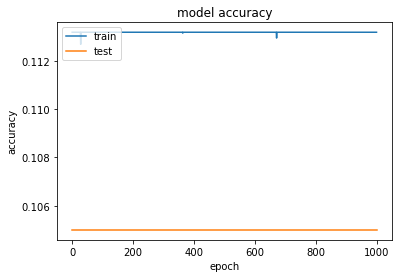

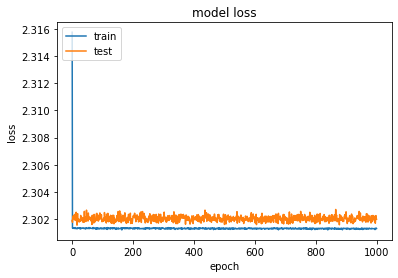

Test loss: 2.301137525177002
Test accuracy: 0.1135


In [90]:
hidden_layer_count = 20
model_20_glorot_normal = create_dense([num_nodes]*hidden_layer_count, hidden_layer_kernel_initializer='glorot_normal')
performance = evaluate(model_20_glorot_normal, epochs=1000)

##### Results and findings - Task 2 / Case 2
Longer training time helped improving model performance for model with 3 hidden layers. It didn't help for the model with 20 hidden layers, neither 100 nor 1000 epochs, neither wirh glorot_uniform nor glorot_normal intitialization.

How long should you train it for? And why? The model should train as long as validation performance significantly improves, i.e. 175-275 epochs for the 3 hidden layer neural network.

#### Case 3: A single layer network (1 hidden layer) and increasing the number of nodes in the layer

Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_562 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_563 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 3s 53us/sample - loss: 2.1347 - acc: 0.3975 - val_loss: 1.9079 - val_acc: 0.6450
Epoch 2/200
54000/54000 [==============================] -

54000/54000 [==============================] - 1s 24us/sample - loss: 0.3212 - acc: 0.9125 - val_loss: 0.2651 - val_acc: 0.9305
Epoch 53/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.3191 - acc: 0.9129 - val_loss: 0.2635 - val_acc: 0.9307
Epoch 54/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.3171 - acc: 0.9130 - val_loss: 0.2618 - val_acc: 0.9308
Epoch 55/200
54000/54000 [==============================] - 1s 24us/sample - loss: 0.3151 - acc: 0.9136 - val_loss: 0.2602 - val_acc: 0.9313
Epoch 56/200
54000/54000 [==============================] - 1s 24us/sample - loss: 0.3132 - acc: 0.9141 - val_loss: 0.2586 - val_acc: 0.9318
Epoch 57/200
54000/54000 [==============================] - 1s 25us/sample - loss: 0.3113 - acc: 0.9146 - val_loss: 0.2571 - val_acc: 0.9320
Epoch 58/200
54000/54000 [==============================] - 1s 24us/sample - loss: 0.3095 - acc: 0.9154 - val_loss: 0.2558 - val_acc: 0.9322
Epoch 59/200
54000/54000 [

54000/54000 [==============================] - 1s 24us/sample - loss: 0.2479 - acc: 0.9314 - val_loss: 0.2073 - val_acc: 0.9445
Epoch 111/200
54000/54000 [==============================] - 1s 24us/sample - loss: 0.2471 - acc: 0.9316 - val_loss: 0.2066 - val_acc: 0.9445
Epoch 112/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2462 - acc: 0.9318 - val_loss: 0.2060 - val_acc: 0.9450
Epoch 113/200
54000/54000 [==============================] - 1s 24us/sample - loss: 0.2454 - acc: 0.9320 - val_loss: 0.2054 - val_acc: 0.9450
Epoch 114/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2447 - acc: 0.9323 - val_loss: 0.2048 - val_acc: 0.9453
Epoch 115/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2438 - acc: 0.9322 - val_loss: 0.2043 - val_acc: 0.9450
Epoch 116/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2431 - acc: 0.9326 - val_loss: 0.2036 - val_acc: 0.9462
Epoch 117/200
54000/

Epoch 168/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2107 - acc: 0.9415 - val_loss: 0.1796 - val_acc: 0.9513
Epoch 169/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2102 - acc: 0.9417 - val_loss: 0.1792 - val_acc: 0.9513
Epoch 170/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2097 - acc: 0.9419 - val_loss: 0.1788 - val_acc: 0.9508
Epoch 171/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2092 - acc: 0.9420 - val_loss: 0.1785 - val_acc: 0.9513
Epoch 172/200
54000/54000 [==============================] - 1s 24us/sample - loss: 0.2087 - acc: 0.9421 - val_loss: 0.1782 - val_acc: 0.9515
Epoch 173/200
54000/54000 [==============================] - 1s 24us/sample - loss: 0.2082 - acc: 0.9421 - val_loss: 0.1780 - val_acc: 0.9518
Epoch 174/200
54000/54000 [==============================] - 1s 23us/sample - loss: 0.2077 - acc: 0.9423 - val_loss: 0.1775 - val_acc: 0.9518
Epoch 

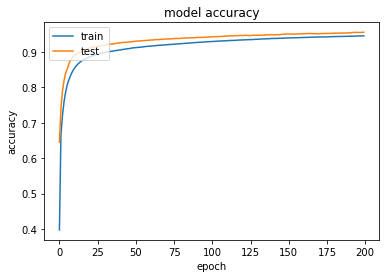

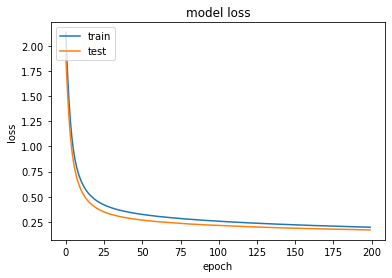

Test loss: 0.19445916079878808
Test accuracy: 0.9445
Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_564 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_565 (Dense)            (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 3s 55us/sample - loss: 2.0973 - acc: 0.4497 - val_loss: 1.8685 - val_acc: 0.6555
Epoch

54000/54000 [==============================] - 1s 27us/sample - loss: 0.3119 - acc: 0.9126 - val_loss: 0.2545 - val_acc: 0.9302
Epoch 53/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3101 - acc: 0.9131 - val_loss: 0.2529 - val_acc: 0.9303
Epoch 54/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3083 - acc: 0.9135 - val_loss: 0.2514 - val_acc: 0.9302
Epoch 55/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3066 - acc: 0.9139 - val_loss: 0.2501 - val_acc: 0.9310
Epoch 56/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3049 - acc: 0.9142 - val_loss: 0.2488 - val_acc: 0.9308
Epoch 57/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3033 - acc: 0.9147 - val_loss: 0.2474 - val_acc: 0.9315
Epoch 58/200
54000/54000 [==============================] - 1s 27us/sample - loss: 0.3017 - acc: 0.9150 - val_loss: 0.2461 - val_acc: 0.9312
Epoch 59/200
54000/54000 [

54000/54000 [==============================] - 2s 31us/sample - loss: 0.2438 - acc: 0.9309 - val_loss: 0.1999 - val_acc: 0.9440
Epoch 111/200
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2430 - acc: 0.9309 - val_loss: 0.1993 - val_acc: 0.9453
Epoch 112/200
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2421 - acc: 0.9313 - val_loss: 0.1987 - val_acc: 0.9452
Epoch 113/200
54000/54000 [==============================] - 2s 31us/sample - loss: 0.2413 - acc: 0.9314 - val_loss: 0.1981 - val_acc: 0.9452
Epoch 114/200
54000/54000 [==============================] - 2s 31us/sample - loss: 0.2405 - acc: 0.9317 - val_loss: 0.1974 - val_acc: 0.9450
Epoch 115/200
54000/54000 [==============================] - 2s 28us/sample - loss: 0.2397 - acc: 0.9317 - val_loss: 0.1966 - val_acc: 0.9457
Epoch 116/200
54000/54000 [==============================] - 2s 31us/sample - loss: 0.2389 - acc: 0.9320 - val_loss: 0.1961 - val_acc: 0.9460
Epoch 117/200
54000/

Epoch 168/200
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2037 - acc: 0.9419 - val_loss: 0.1695 - val_acc: 0.9537
Epoch 169/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.2031 - acc: 0.9421 - val_loss: 0.1691 - val_acc: 0.9540
Epoch 170/200
54000/54000 [==============================] - 2s 35us/sample - loss: 0.2025 - acc: 0.9423 - val_loss: 0.1685 - val_acc: 0.9538
Epoch 171/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2020 - acc: 0.9425 - val_loss: 0.1681 - val_acc: 0.9542
Epoch 172/200
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2014 - acc: 0.9426 - val_loss: 0.1677 - val_acc: 0.9545
Epoch 173/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2009 - acc: 0.9428 - val_loss: 0.1674 - val_acc: 0.9545
Epoch 174/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2003 - acc: 0.9431 - val_loss: 0.1671 - val_acc: 0.9543
Epoch 

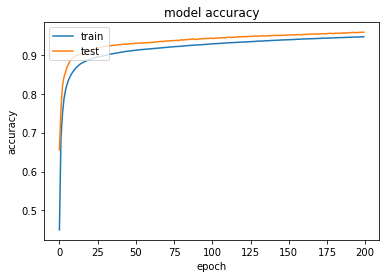

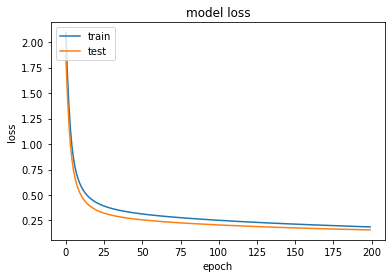

Test loss: 0.18351362691968678
Test accuracy: 0.9474
Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_566 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_567 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 3s 63us/sample - loss: 2.0899 - acc: 0.4584 - val_loss: 1.8339 - val_acc: 0.6798
Epo

54000/54000 [==============================] - 2s 38us/sample - loss: 0.3130 - acc: 0.9110 - val_loss: 0.2561 - val_acc: 0.9308
Epoch 53/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3114 - acc: 0.9114 - val_loss: 0.2549 - val_acc: 0.9318
Epoch 54/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3099 - acc: 0.9114 - val_loss: 0.2537 - val_acc: 0.9322
Epoch 55/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3085 - acc: 0.9121 - val_loss: 0.2523 - val_acc: 0.9323
Epoch 56/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3071 - acc: 0.9126 - val_loss: 0.2512 - val_acc: 0.9328
Epoch 57/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3057 - acc: 0.9130 - val_loss: 0.2502 - val_acc: 0.9333
Epoch 58/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3044 - acc: 0.9132 - val_loss: 0.2489 - val_acc: 0.9335
Epoch 59/200
54000/54000 [

54000/54000 [==============================] - 2s 32us/sample - loss: 0.2536 - acc: 0.9273 - val_loss: 0.2092 - val_acc: 0.9422
Epoch 111/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.2528 - acc: 0.9275 - val_loss: 0.2085 - val_acc: 0.9433
Epoch 112/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2520 - acc: 0.9279 - val_loss: 0.2079 - val_acc: 0.9428
Epoch 113/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2512 - acc: 0.9281 - val_loss: 0.2072 - val_acc: 0.9427
Epoch 114/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.2504 - acc: 0.9283 - val_loss: 0.2067 - val_acc: 0.9433
Epoch 115/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.2497 - acc: 0.9288 - val_loss: 0.2060 - val_acc: 0.9432
Epoch 116/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2489 - acc: 0.9288 - val_loss: 0.2057 - val_acc: 0.9438
Epoch 117/200
54000/

Epoch 168/200
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2134 - acc: 0.9390 - val_loss: 0.1784 - val_acc: 0.9532
Epoch 169/200
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2128 - acc: 0.9388 - val_loss: 0.1778 - val_acc: 0.9537
Epoch 170/200
54000/54000 [==============================] - 2s 35us/sample - loss: 0.2122 - acc: 0.9393 - val_loss: 0.1772 - val_acc: 0.9538
Epoch 171/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2116 - acc: 0.9391 - val_loss: 0.1768 - val_acc: 0.9538
Epoch 172/200
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2111 - acc: 0.9394 - val_loss: 0.1767 - val_acc: 0.9540
Epoch 173/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.2104 - acc: 0.9397 - val_loss: 0.1759 - val_acc: 0.9532
Epoch 174/200
54000/54000 [==============================] - 2s 32us/sample - loss: 0.2099 - acc: 0.9397 - val_loss: 0.1757 - val_acc: 0.9545
Epoch 

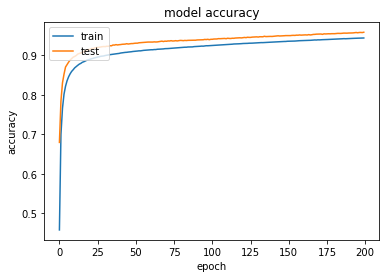

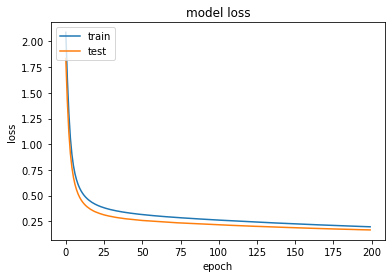

Test loss: 0.19329119214862586
Test accuracy: 0.9453
Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_568 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_569 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 3s 64us/sample - loss: 2.0306 - acc: 0.5062 - val_loss: 1.7422 - val_acc: 0.7223
Epo

54000/54000 [==============================] - 2s 36us/sample - loss: 0.3161 - acc: 0.9086 - val_loss: 0.2600 - val_acc: 0.9268
Epoch 53/200
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3150 - acc: 0.9092 - val_loss: 0.2587 - val_acc: 0.9275
Epoch 54/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.3137 - acc: 0.9097 - val_loss: 0.2580 - val_acc: 0.9270
Epoch 55/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.3125 - acc: 0.9098 - val_loss: 0.2571 - val_acc: 0.9272
Epoch 56/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.3114 - acc: 0.9103 - val_loss: 0.2563 - val_acc: 0.9273
Epoch 57/200
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3102 - acc: 0.9106 - val_loss: 0.2552 - val_acc: 0.9273
Epoch 58/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.3092 - acc: 0.9108 - val_loss: 0.2548 - val_acc: 0.9270
Epoch 59/200
54000/54000 [

54000/54000 [==============================] - 2s 36us/sample - loss: 0.2687 - acc: 0.9227 - val_loss: 0.2234 - val_acc: 0.9338
Epoch 111/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2681 - acc: 0.9233 - val_loss: 0.2233 - val_acc: 0.9350
Epoch 112/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2674 - acc: 0.9237 - val_loss: 0.2227 - val_acc: 0.9343
Epoch 113/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2668 - acc: 0.9235 - val_loss: 0.2222 - val_acc: 0.9348
Epoch 114/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2661 - acc: 0.9238 - val_loss: 0.2215 - val_acc: 0.9353
Epoch 115/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2655 - acc: 0.9244 - val_loss: 0.2213 - val_acc: 0.9355
Epoch 116/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2648 - acc: 0.9238 - val_loss: 0.2205 - val_acc: 0.9355
Epoch 117/200
54000/

Epoch 168/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2334 - acc: 0.9340 - val_loss: 0.1961 - val_acc: 0.9448
Epoch 169/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2328 - acc: 0.9341 - val_loss: 0.1955 - val_acc: 0.9453
Epoch 170/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2323 - acc: 0.9342 - val_loss: 0.1950 - val_acc: 0.9455
Epoch 171/200
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2317 - acc: 0.9344 - val_loss: 0.1947 - val_acc: 0.9457
Epoch 172/200
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2311 - acc: 0.9344 - val_loss: 0.1941 - val_acc: 0.9458
Epoch 173/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2305 - acc: 0.9346 - val_loss: 0.1938 - val_acc: 0.9457
Epoch 174/200
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2299 - acc: 0.9349 - val_loss: 0.1936 - val_acc: 0.9470
Epoch 

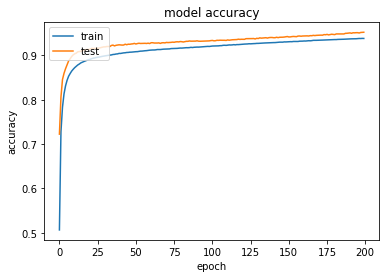

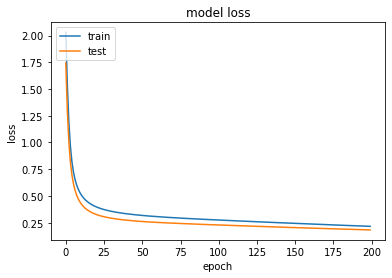

Test loss: 0.21457061401605607
Test accuracy: 0.9379


In [95]:
num_units = [32, 64, 128, 256]
case_3_performances = []
case_3_models = []

for num_nodes in num_units:
    model = create_dense([num_nodes])
    performance = evaluate(model, epochs=200)
    case_3_models.append(model)
    case_3_performances.append(performance)

In [99]:
# show model performance per number of nodes in table
for i, performance in enumerate(case_3_performances):
    performance['number of hidden units'] = num_units[i]
pd.DataFrame(case_3_performances).sort_values(by=['test accuracy'], ascending=False)

,test loss,test accuracy,train loss,train accuracy,val loss,val accuracy,number of hidden units
0,0.194459,0.9445,0.196210,0.945315,0.169385,0.955333,32
1,0.183514,0.9474,0.186995,0.946759,0.157386,0.958333,64
2,0.193291,0.9453,0.195666,0.943963,0.165143,0.958500,128
3,0.214571,0.9379,0.215731,0.938315,0.182205,0.952333,256


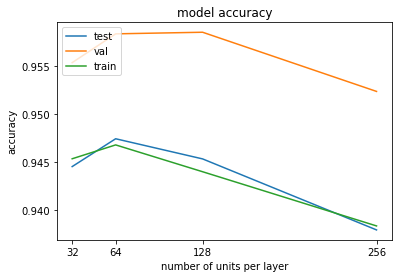

In [100]:
# plot model performance per number of nodes
plt.plot([count for count in num_units],[p['test accuracy'] for p in case_3_performances])
plt.plot([count for count in num_units],[p['val accuracy'] for p in case_3_performances])
plt.plot([count for count in num_units],[p['train accuracy'] for p in case_3_performances])
plt.xticks(ticks=[count for count in num_units])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of units per layer')
plt.legend(['test', 'val', 'train'], loc='upper left')
plt.show()

##### Results and findings - Task 2 / Case 3
Model performance is best for 64 hidden units among the number of units tried (32, 64, 128 and 256).

#### Case 4: Adding more nodes and more layers


Model: "model_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_61 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_624 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_625 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_626 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/150
54000/54000 [==============================] - 4s 74u

54000/54000 [==============================] - 2s 29us/sample - loss: 0.4426 - acc: 0.8810 - val_loss: 0.3765 - val_acc: 0.9058
Epoch 52/150
54000/54000 [==============================] - 2s 31us/sample - loss: 0.4371 - acc: 0.8824 - val_loss: 0.3715 - val_acc: 0.9065
Epoch 53/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.4319 - acc: 0.8837 - val_loss: 0.3667 - val_acc: 0.9075
Epoch 54/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.4268 - acc: 0.8845 - val_loss: 0.3624 - val_acc: 0.9082
Epoch 55/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.4220 - acc: 0.8862 - val_loss: 0.3581 - val_acc: 0.9092
Epoch 56/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.4173 - acc: 0.8877 - val_loss: 0.3537 - val_acc: 0.9097
Epoch 57/150
54000/54000 [==============================] - 2s 28us/sample - loss: 0.4128 - acc: 0.8886 - val_loss: 0.3499 - val_acc: 0.9105
Epoch 58/150
54000/54000 [

54000/54000 [==============================] - 2s 29us/sample - loss: 0.2853 - acc: 0.9199 - val_loss: 0.2404 - val_acc: 0.9337
Epoch 110/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2838 - acc: 0.9204 - val_loss: 0.2392 - val_acc: 0.9343
Epoch 111/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2823 - acc: 0.9208 - val_loss: 0.2380 - val_acc: 0.9340
Epoch 112/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2810 - acc: 0.9210 - val_loss: 0.2368 - val_acc: 0.9347
Epoch 113/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2796 - acc: 0.9209 - val_loss: 0.2357 - val_acc: 0.9348
Epoch 114/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2782 - acc: 0.9218 - val_loss: 0.2343 - val_acc: 0.9350
Epoch 115/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2768 - acc: 0.9220 - val_loss: 0.2334 - val_acc: 0.9357
Epoch 116/150
54000/

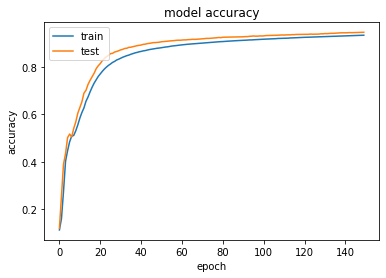

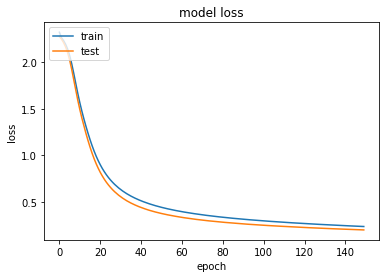

Test loss: 0.23190996125936508
Test accuracy: 0.9331

Model: "model_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_63 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_62 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_627 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_628 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_629 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_630 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0


54000/54000 [==============================] - 2s 34us/sample - loss: 0.8615 - acc: 0.7683 - val_loss: 0.7950 - val_acc: 0.7982
Epoch 51/225
54000/54000 [==============================] - 2s 34us/sample - loss: 0.8364 - acc: 0.7740 - val_loss: 0.7691 - val_acc: 0.8087
Epoch 52/225
54000/54000 [==============================] - 2s 38us/sample - loss: 0.8129 - acc: 0.7819 - val_loss: 0.7455 - val_acc: 0.8140
Epoch 53/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.7910 - acc: 0.7873 - val_loss: 0.7230 - val_acc: 0.8202
Epoch 54/225
54000/54000 [==============================] - 2s 38us/sample - loss: 0.7706 - acc: 0.7932 - val_loss: 0.7025 - val_acc: 0.8240
Epoch 55/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.7514 - acc: 0.7996 - val_loss: 0.6833 - val_acc: 0.8310
Epoch 56/225
54000/54000 [==============================] - 2s 34us/sample - loss: 0.7335 - acc: 0.8039 - val_loss: 0.6655 - val_acc: 0.8337
Epoch 57/225
54000/54000 [

54000/54000 [==============================] - 2s 32us/sample - loss: 0.3823 - acc: 0.8964 - val_loss: 0.3322 - val_acc: 0.9123
Epoch 109/225
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3796 - acc: 0.8972 - val_loss: 0.3292 - val_acc: 0.9123
Epoch 110/225
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3769 - acc: 0.8978 - val_loss: 0.3268 - val_acc: 0.9133
Epoch 111/225
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3742 - acc: 0.8989 - val_loss: 0.3245 - val_acc: 0.9140
Epoch 112/225
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3715 - acc: 0.8990 - val_loss: 0.3224 - val_acc: 0.9147
Epoch 113/225
54000/54000 [==============================] - 2s 32us/sample - loss: 0.3691 - acc: 0.8999 - val_loss: 0.3199 - val_acc: 0.9152
Epoch 114/225
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3665 - acc: 0.9004 - val_loss: 0.3179 - val_acc: 0.9147
Epoch 115/225
54000/

Epoch 166/225
54000/54000 [==============================] - 2s 33us/sample - loss: 0.2691 - acc: 0.9268 - val_loss: 0.2345 - val_acc: 0.9405
Epoch 167/225
54000/54000 [==============================] - 3s 48us/sample - loss: 0.2677 - acc: 0.9274 - val_loss: 0.2335 - val_acc: 0.9400
Epoch 168/225
54000/54000 [==============================] - 3s 49us/sample - loss: 0.2663 - acc: 0.9276 - val_loss: 0.2321 - val_acc: 0.9405
Epoch 169/225
54000/54000 [==============================] - 3s 49us/sample - loss: 0.2649 - acc: 0.9283 - val_loss: 0.2310 - val_acc: 0.9408
Epoch 170/225
54000/54000 [==============================] - 3s 48us/sample - loss: 0.2635 - acc: 0.9284 - val_loss: 0.2299 - val_acc: 0.9422
Epoch 171/225
54000/54000 [==============================] - 3s 49us/sample - loss: 0.2621 - acc: 0.9285 - val_loss: 0.2288 - val_acc: 0.9407
Epoch 172/225
54000/54000 [==============================] - 3s 48us/sample - loss: 0.2608 - acc: 0.9290 - val_loss: 0.2276 - val_acc: 0.9412
Epoch 

Epoch 224/225
54000/54000 [==============================] - 2s 31us/sample - loss: 0.2042 - acc: 0.9444 - val_loss: 0.1855 - val_acc: 0.9512
Epoch 225/225
54000/54000 [==============================] - 2s 32us/sample - loss: 0.2034 - acc: 0.9444 - val_loss: 0.1847 - val_acc: 0.9503
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


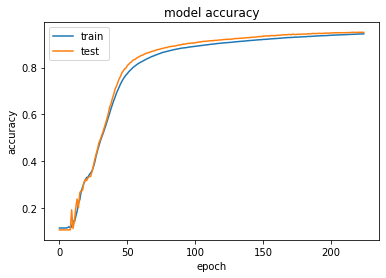

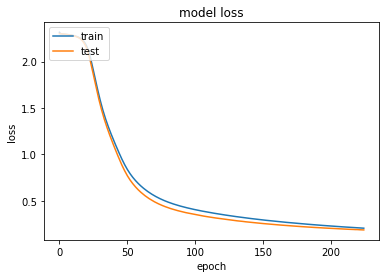

Test loss: 0.2138667729139328
Test accuracy: 0.9421

Model: "model_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_64 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_63 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_631 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_632 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_633 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_634 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense

54000/54000 [==============================] - 2s 38us/sample - loss: 2.3011 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 49/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.3010 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 50/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.3010 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 51/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.3011 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 52/375
54000/54000 [==============================] - 2s 39us/sample - loss: 2.3010 - acc: 0.1132 - val_loss: 2.3016 - val_acc: 0.1050
Epoch 53/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.3010 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 54/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.3010 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 55/375
54000/54000 [

54000/54000 [==============================] - 2s 42us/sample - loss: 2.3005 - acc: 0.1132 - val_loss: 2.3013 - val_acc: 0.1050
Epoch 107/375
54000/54000 [==============================] - 2s 43us/sample - loss: 2.3006 - acc: 0.1132 - val_loss: 2.3011 - val_acc: 0.1050
Epoch 108/375
54000/54000 [==============================] - 2s 43us/sample - loss: 2.3005 - acc: 0.1132 - val_loss: 2.3014 - val_acc: 0.1050
Epoch 109/375
54000/54000 [==============================] - 2s 42us/sample - loss: 2.3005 - acc: 0.1132 - val_loss: 2.3010 - val_acc: 0.1050
Epoch 110/375
54000/54000 [==============================] - 2s 39us/sample - loss: 2.3005 - acc: 0.1132 - val_loss: 2.3014 - val_acc: 0.1050
Epoch 111/375
54000/54000 [==============================] - 2s 39us/sample - loss: 2.3005 - acc: 0.1132 - val_loss: 2.3014 - val_acc: 0.1050
Epoch 112/375
54000/54000 [==============================] - 2s 40us/sample - loss: 2.3005 - acc: 0.1132 - val_loss: 2.3010 - val_acc: 0.1050
Epoch 113/375
54000/

Epoch 164/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.2983 - acc: 0.1132 - val_loss: 2.2988 - val_acc: 0.1050
Epoch 165/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.2982 - acc: 0.1132 - val_loss: 2.2989 - val_acc: 0.1050
Epoch 166/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.2981 - acc: 0.1132 - val_loss: 2.2987 - val_acc: 0.1050
Epoch 167/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.2979 - acc: 0.1132 - val_loss: 2.2985 - val_acc: 0.1050
Epoch 168/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.2977 - acc: 0.1132 - val_loss: 2.2988 - val_acc: 0.1050
Epoch 169/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.2976 - acc: 0.1132 - val_loss: 2.2984 - val_acc: 0.1050
Epoch 170/375
54000/54000 [==============================] - 2s 38us/sample - loss: 2.2974 - acc: 0.1132 - val_loss: 2.2986 - val_acc: 0.1050
Epoch 

54000/54000 [==============================] - 2s 38us/sample - loss: 1.7480 - acc: 0.2811 - val_loss: 1.7212 - val_acc: 0.2805
Epoch 222/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.7345 - acc: 0.2841 - val_loss: 1.7075 - val_acc: 0.2882
Epoch 223/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.7217 - acc: 0.2914 - val_loss: 1.6942 - val_acc: 0.2935
Epoch 224/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.7092 - acc: 0.2925 - val_loss: 1.6818 - val_acc: 0.2907
Epoch 225/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.6971 - acc: 0.3002 - val_loss: 1.6688 - val_acc: 0.2915
Epoch 226/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.6855 - acc: 0.3031 - val_loss: 1.6569 - val_acc: 0.2985
Epoch 227/375
54000/54000 [==============================] - 2s 42us/sample - loss: 1.6742 - acc: 0.3069 - val_loss: 1.6461 - val_acc: 0.2975
Epoch 228/375
54000/

Epoch 279/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.2891 - acc: 0.5286 - val_loss: 1.2528 - val_acc: 0.5482
Epoch 280/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.2832 - acc: 0.5314 - val_loss: 1.2473 - val_acc: 0.5485
Epoch 281/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.2776 - acc: 0.5346 - val_loss: 1.2417 - val_acc: 0.5520
Epoch 282/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.2719 - acc: 0.5373 - val_loss: 1.2368 - val_acc: 0.5567
Epoch 283/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.2665 - acc: 0.5389 - val_loss: 1.2334 - val_acc: 0.5492
Epoch 284/375
54000/54000 [==============================] - 2s 36us/sample - loss: 1.2610 - acc: 0.5410 - val_loss: 1.2261 - val_acc: 0.5568
Epoch 285/375
54000/54000 [==============================] - 2s 36us/sample - loss: 1.2557 - acc: 0.5436 - val_loss: 1.2209 - val_acc: 0.5572
Epoch 

Epoch 337/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.0264 - acc: 0.6805 - val_loss: 1.0082 - val_acc: 0.6762
Epoch 338/375
54000/54000 [==============================] - 2s 43us/sample - loss: 1.0217 - acc: 0.6831 - val_loss: 1.0043 - val_acc: 0.6848
Epoch 339/375
54000/54000 [==============================] - 2s 41us/sample - loss: 1.0181 - acc: 0.6835 - val_loss: 1.0006 - val_acc: 0.6952
Epoch 340/375
54000/54000 [==============================] - 2s 37us/sample - loss: 1.0136 - acc: 0.6873 - val_loss: 0.9963 - val_acc: 0.6880
Epoch 341/375
54000/54000 [==============================] - 2s 37us/sample - loss: 1.0096 - acc: 0.6905 - val_loss: 0.9937 - val_acc: 0.6890
Epoch 342/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.0049 - acc: 0.6944 - val_loss: 0.9873 - val_acc: 0.6967
Epoch 343/375
54000/54000 [==============================] - 2s 38us/sample - loss: 1.0005 - acc: 0.6977 - val_loss: 0.9832 - val_acc: 0.7123
Epoch 

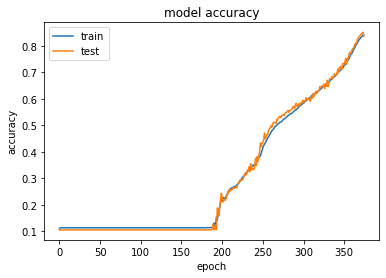

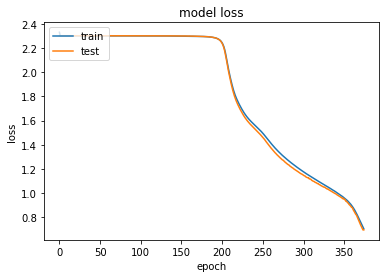

Test loss: 0.7453813339233398
Test accuracy: 0.8291

Model: "model_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_65 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_64 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_637 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_638 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_639 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_640 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense

54000/54000 [==============================] - 2s 44us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 47/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 48/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 49/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 50/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 51/525
54000/54000 [==============================] - 2s 45us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 52/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 53/525
54000/54000 [

54000/54000 [==============================] - 3s 49us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 105/525
54000/54000 [==============================] - 3s 48us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 106/525
54000/54000 [==============================] - 2s 46us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 107/525
54000/54000 [==============================] - 2s 45us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 108/525
54000/54000 [==============================] - 2s 45us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 109/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 110/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 111/525
54000/

Epoch 162/525
54000/54000 [==============================] - 2s 41us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 163/525
54000/54000 [==============================] - 2s 41us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 164/525
54000/54000 [==============================] - 2s 41us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 165/525
54000/54000 [==============================] - 2s 43us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 166/525
54000/54000 [==============================] - 2s 43us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 167/525
54000/54000 [==============================] - 2s 43us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 168/525
54000/54000 [==============================] - 2s 43us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 

Epoch 220/525
54000/54000 [==============================] - 3s 50us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 221/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 222/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 223/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 224/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 225/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 226/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 

Epoch 278/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 279/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 280/525
54000/54000 [==============================] - 2s 46us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 281/525
54000/54000 [==============================] - 3s 48us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 282/525
54000/54000 [==============================] - 3s 50us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 283/525
54000/54000 [==============================] - 2s 45us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 284/525
54000/54000 [==============================] - 2s 45us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 

Epoch 336/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 337/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 338/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 339/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 340/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 341/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 342/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 

Epoch 394/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 395/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 396/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 397/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 398/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 399/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 400/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 

Epoch 452/525
54000/54000 [==============================] - 2s 45us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 453/525
54000/54000 [==============================] - 3s 49us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 454/525
54000/54000 [==============================] - 3s 55us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 455/525
54000/54000 [==============================] - 3s 48us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 456/525
54000/54000 [==============================] - 3s 49us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 457/525
54000/54000 [==============================] - 3s 46us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 458/525
54000/54000 [==============================] - 2s 45us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 

Epoch 510/525
54000/54000 [==============================] - 3s 48us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 511/525
54000/54000 [==============================] - 2s 43us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 512/525
54000/54000 [==============================] - 2s 43us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 513/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 514/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 515/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 516/525
54000/54000 [==============================] - 2s 44us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 

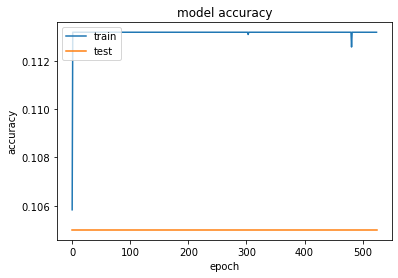

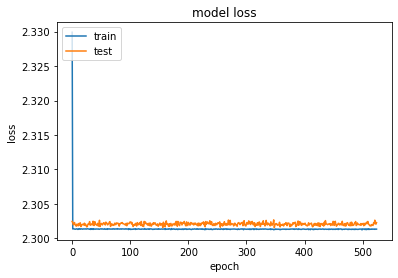

Test loss: 2.3011418144226075
Test accuracy: 0.1135

Model: "model_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_65 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_645 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_646 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_647 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/150
5

54000/54000 [==============================] - 2s 33us/sample - loss: 0.3674 - acc: 0.8989 - val_loss: 0.3094 - val_acc: 0.9160
Epoch 52/150
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3639 - acc: 0.8998 - val_loss: 0.3064 - val_acc: 0.9162
Epoch 53/150
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3606 - acc: 0.9006 - val_loss: 0.3033 - val_acc: 0.9172
Epoch 54/150
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3573 - acc: 0.9010 - val_loss: 0.3002 - val_acc: 0.9183
Epoch 55/150
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3541 - acc: 0.9019 - val_loss: 0.2977 - val_acc: 0.9192
Epoch 56/150
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3512 - acc: 0.9023 - val_loss: 0.2948 - val_acc: 0.9198
Epoch 57/150
54000/54000 [==============================] - 2s 33us/sample - loss: 0.3482 - acc: 0.9029 - val_loss: 0.2921 - val_acc: 0.9203
Epoch 58/150
54000/54000 [

54000/54000 [==============================] - 2s 29us/sample - loss: 0.2562 - acc: 0.9262 - val_loss: 0.2132 - val_acc: 0.9390
Epoch 110/150
54000/54000 [==============================] - 2s 28us/sample - loss: 0.2550 - acc: 0.9267 - val_loss: 0.2124 - val_acc: 0.9392
Epoch 111/150
54000/54000 [==============================] - 2s 28us/sample - loss: 0.2538 - acc: 0.9268 - val_loss: 0.2113 - val_acc: 0.9397
Epoch 112/150
54000/54000 [==============================] - 2s 28us/sample - loss: 0.2526 - acc: 0.9273 - val_loss: 0.2105 - val_acc: 0.9397
Epoch 113/150
54000/54000 [==============================] - 2s 28us/sample - loss: 0.2515 - acc: 0.9277 - val_loss: 0.2093 - val_acc: 0.9402
Epoch 114/150
54000/54000 [==============================] - 2s 29us/sample - loss: 0.2503 - acc: 0.9280 - val_loss: 0.2084 - val_acc: 0.9398
Epoch 115/150
54000/54000 [==============================] - 2s 30us/sample - loss: 0.2492 - acc: 0.9283 - val_loss: 0.2075 - val_acc: 0.9408
Epoch 116/150
54000/

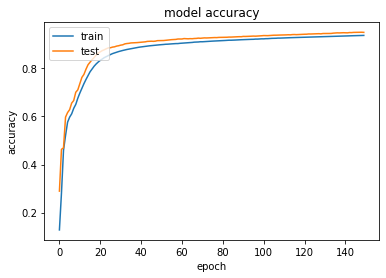

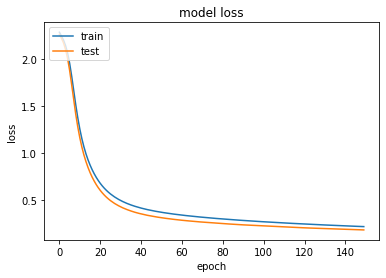

Test loss: 0.2103351603657007
Test accuracy: 0.9398

Model: "model_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_67 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_66 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_648 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_649 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_650 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_651 (Dense)            (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_

54000/54000 [==============================] - 2s 39us/sample - loss: 0.7038 - acc: 0.7964 - val_loss: 0.6259 - val_acc: 0.8317
Epoch 51/225
54000/54000 [==============================] - 2s 41us/sample - loss: 0.6884 - acc: 0.8021 - val_loss: 0.6100 - val_acc: 0.8422
Epoch 52/225
54000/54000 [==============================] - 2s 40us/sample - loss: 0.6733 - acc: 0.8086 - val_loss: 0.5950 - val_acc: 0.8467
Epoch 53/225
54000/54000 [==============================] - 2s 40us/sample - loss: 0.6587 - acc: 0.8147 - val_loss: 0.5805 - val_acc: 0.8497
Epoch 54/225
54000/54000 [==============================] - 2s 39us/sample - loss: 0.6446 - acc: 0.8195 - val_loss: 0.5667 - val_acc: 0.8565
Epoch 55/225
54000/54000 [==============================] - 2s 39us/sample - loss: 0.6308 - acc: 0.8246 - val_loss: 0.5529 - val_acc: 0.8595
Epoch 56/225
54000/54000 [==============================] - 2s 42us/sample - loss: 0.6175 - acc: 0.8293 - val_loss: 0.5398 - val_acc: 0.8627
Epoch 57/225
54000/54000 [

54000/54000 [==============================] - 2s 37us/sample - loss: 0.3377 - acc: 0.9064 - val_loss: 0.2886 - val_acc: 0.9210
Epoch 109/225
54000/54000 [==============================] - 2s 38us/sample - loss: 0.3354 - acc: 0.9069 - val_loss: 0.2862 - val_acc: 0.9213
Epoch 110/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3331 - acc: 0.9078 - val_loss: 0.2845 - val_acc: 0.9222
Epoch 111/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3309 - acc: 0.9084 - val_loss: 0.2825 - val_acc: 0.9233
Epoch 112/225
54000/54000 [==============================] - 2s 38us/sample - loss: 0.3287 - acc: 0.9085 - val_loss: 0.2810 - val_acc: 0.9235
Epoch 113/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3265 - acc: 0.9099 - val_loss: 0.2791 - val_acc: 0.9242
Epoch 114/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3244 - acc: 0.9101 - val_loss: 0.2770 - val_acc: 0.9240
Epoch 115/225
54000/

Epoch 166/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2369 - acc: 0.9334 - val_loss: 0.2048 - val_acc: 0.9443
Epoch 167/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2355 - acc: 0.9339 - val_loss: 0.2044 - val_acc: 0.9437
Epoch 168/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2343 - acc: 0.9345 - val_loss: 0.2029 - val_acc: 0.9442
Epoch 169/225
54000/54000 [==============================] - 2s 37us/sample - loss: 0.2330 - acc: 0.9343 - val_loss: 0.2019 - val_acc: 0.9450
Epoch 170/225
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2318 - acc: 0.9346 - val_loss: 0.2009 - val_acc: 0.9445
Epoch 171/225
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2305 - acc: 0.9351 - val_loss: 0.1998 - val_acc: 0.9457
Epoch 172/225
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2293 - acc: 0.9354 - val_loss: 0.1990 - val_acc: 0.9452
Epoch 

Epoch 224/225
54000/54000 [==============================] - 2s 43us/sample - loss: 0.1783 - acc: 0.9501 - val_loss: 0.1590 - val_acc: 0.9567
Epoch 225/225
54000/54000 [==============================] - 3s 47us/sample - loss: 0.1776 - acc: 0.9498 - val_loss: 0.1587 - val_acc: 0.9573
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


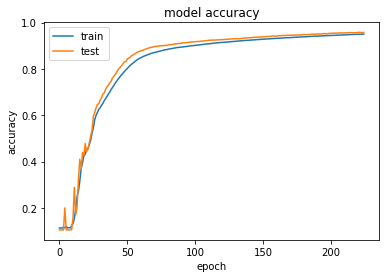

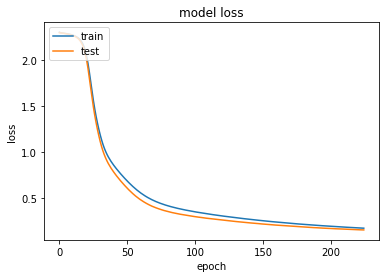

Test loss: 0.1861625869780779
Test accuracy: 0.9466

Model: "model_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_67 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_652 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_653 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_654 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_655 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense

54000/54000 [==============================] - 3s 49us/sample - loss: 2.3012 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 49/375
54000/54000 [==============================] - 3s 51us/sample - loss: 2.3012 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 50/375
54000/54000 [==============================] - 3s 49us/sample - loss: 2.3012 - acc: 0.1128 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 51/375
54000/54000 [==============================] - 3s 51us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 52/375
54000/54000 [==============================] - 3s 51us/sample - loss: 2.3012 - acc: 0.1131 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 53/375
54000/54000 [==============================] - 3s 52us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 54/375
54000/54000 [==============================] - 3s 52us/sample - loss: 2.3012 - acc: 0.1131 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 55/375
54000/54000 [

54000/54000 [==============================] - 3s 49us/sample - loss: 2.3008 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 107/375
54000/54000 [==============================] - 3s 49us/sample - loss: 2.3007 - acc: 0.1134 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 108/375
54000/54000 [==============================] - 3s 49us/sample - loss: 2.3008 - acc: 0.1132 - val_loss: 2.3015 - val_acc: 0.1050
Epoch 109/375
54000/54000 [==============================] - 3s 49us/sample - loss: 2.3007 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 110/375
54000/54000 [==============================] - 3s 50us/sample - loss: 2.3007 - acc: 0.1132 - val_loss: 2.3014 - val_acc: 0.1050
Epoch 111/375
54000/54000 [==============================] - 3s 49us/sample - loss: 2.3007 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 112/375
54000/54000 [==============================] - 3s 49us/sample - loss: 2.3007 - acc: 0.1133 - val_loss: 2.3015 - val_acc: 0.1050
Epoch 113/375
54000/

Epoch 164/375
54000/54000 [==============================] - 3s 48us/sample - loss: 2.2995 - acc: 0.1134 - val_loss: 2.3000 - val_acc: 0.1050
Epoch 165/375
54000/54000 [==============================] - 3s 52us/sample - loss: 2.2993 - acc: 0.1135 - val_loss: 2.3002 - val_acc: 0.1050
Epoch 166/375
54000/54000 [==============================] - 3s 53us/sample - loss: 2.2995 - acc: 0.1132 - val_loss: 2.2996 - val_acc: 0.1050
Epoch 167/375
54000/54000 [==============================] - 3s 49us/sample - loss: 2.2992 - acc: 0.1138 - val_loss: 2.2999 - val_acc: 0.1050
Epoch 168/375
54000/54000 [==============================] - 3s 52us/sample - loss: 2.2992 - acc: 0.1149 - val_loss: 2.3004 - val_acc: 0.1050
Epoch 169/375
54000/54000 [==============================] - 3s 53us/sample - loss: 2.2993 - acc: 0.1132 - val_loss: 2.2999 - val_acc: 0.1050
Epoch 170/375
54000/54000 [==============================] - 3s 51us/sample - loss: 2.2991 - acc: 0.1132 - val_loss: 2.3004 - val_acc: 0.1050
Epoch 

Epoch 222/375
54000/54000 [==============================] - 3s 49us/sample - loss: 2.2808 - acc: 0.1759 - val_loss: 2.2803 - val_acc: 0.1697
Epoch 223/375
54000/54000 [==============================] - 3s 50us/sample - loss: 2.2785 - acc: 0.1901 - val_loss: 2.2778 - val_acc: 0.1540
Epoch 224/375
54000/54000 [==============================] - 3s 50us/sample - loss: 2.2757 - acc: 0.1902 - val_loss: 2.2748 - val_acc: 0.1873
Epoch 225/375
54000/54000 [==============================] - 3s 54us/sample - loss: 2.2724 - acc: 0.1997 - val_loss: 2.2708 - val_acc: 0.2017
Epoch 226/375
54000/54000 [==============================] - 3s 53us/sample - loss: 2.2684 - acc: 0.2059 - val_loss: 2.2661 - val_acc: 0.1960
Epoch 227/375
54000/54000 [==============================] - 3s 52us/sample - loss: 2.2634 - acc: 0.2066 - val_loss: 2.2602 - val_acc: 0.1990
Epoch 228/375
54000/54000 [==============================] - 3s 50us/sample - loss: 2.2569 - acc: 0.2084 - val_loss: 2.2534 - val_acc: 0.1987
Epoch 

Epoch 280/375
54000/54000 [==============================] - 2s 46us/sample - loss: 1.1776 - acc: 0.5533 - val_loss: 1.1348 - val_acc: 0.5810
Epoch 281/375
54000/54000 [==============================] - 2s 45us/sample - loss: 1.1584 - acc: 0.5620 - val_loss: 1.1156 - val_acc: 0.6007
Epoch 282/375
54000/54000 [==============================] - 3s 48us/sample - loss: 1.1392 - acc: 0.5741 - val_loss: 1.0952 - val_acc: 0.6072
Epoch 283/375
54000/54000 [==============================] - 3s 48us/sample - loss: 1.1202 - acc: 0.5802 - val_loss: 1.0751 - val_acc: 0.6127
Epoch 284/375
54000/54000 [==============================] - 3s 49us/sample - loss: 1.1016 - acc: 0.5930 - val_loss: 1.0565 - val_acc: 0.6137
Epoch 285/375
54000/54000 [==============================] - 3s 49us/sample - loss: 1.0835 - acc: 0.6036 - val_loss: 1.0367 - val_acc: 0.6370
Epoch 286/375
54000/54000 [==============================] - 3s 49us/sample - loss: 1.0660 - acc: 0.6161 - val_loss: 1.0213 - val_acc: 0.6438
Epoch 

Epoch 338/375
54000/54000 [==============================] - 3s 53us/sample - loss: 0.5112 - acc: 0.8714 - val_loss: 0.4609 - val_acc: 0.8923
Epoch 339/375
54000/54000 [==============================] - 3s 52us/sample - loss: 0.5058 - acc: 0.8730 - val_loss: 0.4551 - val_acc: 0.8940
Epoch 340/375
54000/54000 [==============================] - 3s 49us/sample - loss: 0.5004 - acc: 0.8742 - val_loss: 0.4509 - val_acc: 0.8962
Epoch 341/375
54000/54000 [==============================] - 3s 49us/sample - loss: 0.4950 - acc: 0.8764 - val_loss: 0.4463 - val_acc: 0.8965
Epoch 342/375
54000/54000 [==============================] - 3s 49us/sample - loss: 0.4900 - acc: 0.8778 - val_loss: 0.4421 - val_acc: 0.8972
Epoch 343/375
54000/54000 [==============================] - 3s 48us/sample - loss: 0.4848 - acc: 0.8787 - val_loss: 0.4366 - val_acc: 0.8998
Epoch 344/375
54000/54000 [==============================] - 3s 50us/sample - loss: 0.4800 - acc: 0.8800 - val_loss: 0.4320 - val_acc: 0.9003
Epoch 

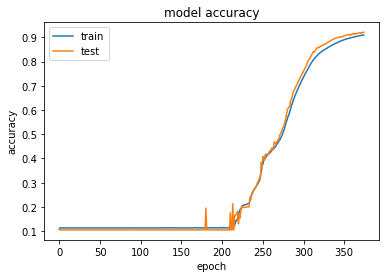

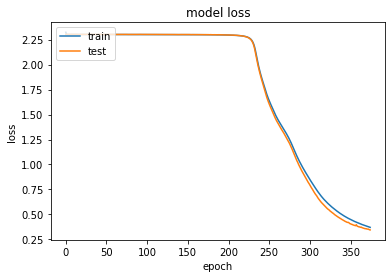

Test loss: 0.40400712187290194
Test accuracy: 0.9058

Model: "model_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_69 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_68 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_658 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_659 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_660 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_661 (Dense)            (None, 64)                4160      
_________________________________________________________________
dens

54000/54000 [==============================] - 3s 60us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 47/525
54000/54000 [==============================] - 3s 60us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 48/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 49/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 50/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 51/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 52/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3030 - val_acc: 0.1050
Epoch 53/525
54000/54000 [

54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1129 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 105/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3015 - acc: 0.1130 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 106/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 107/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 108/525
54000/54000 [==============================] - 3s 53us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 109/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 110/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 111/525
54000/

Epoch 162/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3016 - val_acc: 0.1050
Epoch 163/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 164/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 165/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 166/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 167/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 168/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3015 - acc: 0.1131 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 

Epoch 220/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3030 - val_acc: 0.1050
Epoch 221/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 222/525
54000/54000 [==============================] - 3s 60us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 223/525
54000/54000 [==============================] - 3s 54us/sample - loss: 2.3015 - acc: 0.1131 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 224/525
54000/54000 [==============================] - 3s 54us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 225/525
54000/54000 [==============================] - 3s 58us/sample - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 226/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 

Epoch 278/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3014 - acc: 0.1127 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 279/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 280/525
54000/54000 [==============================] - 3s 62us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 281/525
54000/54000 [==============================] - 3s 63us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 282/525
54000/54000 [==============================] - 3s 62us/sample - loss: 2.3015 - acc: 0.1127 - val_loss: 2.3015 - val_acc: 0.1050
Epoch 283/525
54000/54000 [==============================] - 3s 62us/sample - loss: 2.3015 - acc: 0.1129 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 284/525
54000/54000 [==============================] - 3s 59us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 

Epoch 336/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 337/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 338/525
54000/54000 [==============================] - 3s 53us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 339/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 340/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1131 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 341/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 342/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 

Epoch 394/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 395/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1131 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 396/525
54000/54000 [==============================] - 3s 57us/sample - loss: 2.3014 - acc: 0.1130 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 397/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 398/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 399/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 400/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 

Epoch 452/525
54000/54000 [==============================] - 3s 54us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 453/525
54000/54000 [==============================] - 3s 52us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 454/525
54000/54000 [==============================] - 3s 51us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 455/525
54000/54000 [==============================] - 3s 53us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 456/525
54000/54000 [==============================] - 3s 53us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 457/525
54000/54000 [==============================] - 3s 53us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 458/525
54000/54000 [==============================] - 3s 55us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 

Epoch 510/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 511/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 512/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 513/525
54000/54000 [==============================] - 3s 56us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 514/525
54000/54000 [==============================] - 3s 55us/sample - loss: 2.3013 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 515/525
54000/54000 [==============================] - 3s 55us/sample - loss: 2.3014 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 516/525
54000/54000 [==============================] - 3s 55us/sample - loss: 2.3015 - acc: 0.1132 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 

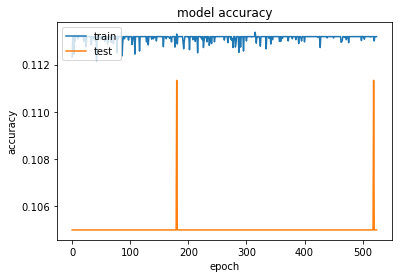

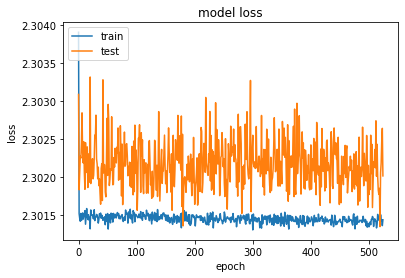

Test loss: 2.3009581047058107
Test accuracy: 0.1135

Model: "model_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_69 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_666 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_667 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_668 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/150

54000/54000 [==============================] - 2s 42us/sample - loss: 0.3560 - acc: 0.8999 - val_loss: 0.2983 - val_acc: 0.9178
Epoch 52/150
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3533 - acc: 0.9009 - val_loss: 0.2959 - val_acc: 0.9183
Epoch 53/150
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3508 - acc: 0.9010 - val_loss: 0.2936 - val_acc: 0.9192
Epoch 54/150
54000/54000 [==============================] - 2s 43us/sample - loss: 0.3484 - acc: 0.9015 - val_loss: 0.2915 - val_acc: 0.9192
Epoch 55/150
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3460 - acc: 0.9020 - val_loss: 0.2897 - val_acc: 0.9197
Epoch 56/150
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3437 - acc: 0.9027 - val_loss: 0.2875 - val_acc: 0.9210
Epoch 57/150
54000/54000 [==============================] - 2s 41us/sample - loss: 0.3414 - acc: 0.9028 - val_loss: 0.2854 - val_acc: 0.9205
Epoch 58/150
54000/54000 [

54000/54000 [==============================] - 2s 42us/sample - loss: 0.2661 - acc: 0.9234 - val_loss: 0.2208 - val_acc: 0.9363
Epoch 110/150
54000/54000 [==============================] - 2s 41us/sample - loss: 0.2650 - acc: 0.9236 - val_loss: 0.2197 - val_acc: 0.9357
Epoch 111/150
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2640 - acc: 0.9242 - val_loss: 0.2188 - val_acc: 0.9358
Epoch 112/150
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2629 - acc: 0.9248 - val_loss: 0.2181 - val_acc: 0.9363
Epoch 113/150
54000/54000 [==============================] - 2s 42us/sample - loss: 0.2618 - acc: 0.9244 - val_loss: 0.2173 - val_acc: 0.9367
Epoch 114/150
54000/54000 [==============================] - 2s 42us/sample - loss: 0.2608 - acc: 0.9250 - val_loss: 0.2165 - val_acc: 0.9365
Epoch 115/150
54000/54000 [==============================] - 2s 42us/sample - loss: 0.2598 - acc: 0.9249 - val_loss: 0.2156 - val_acc: 0.9372
Epoch 116/150
54000/

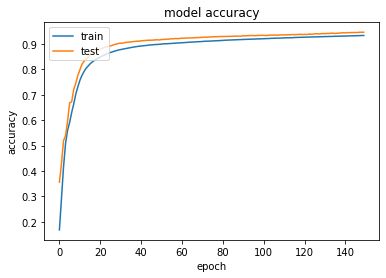

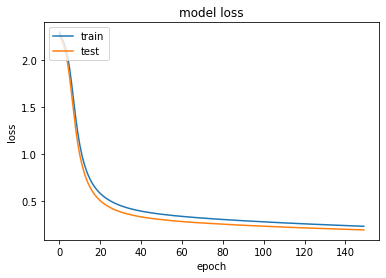

Test loss: 0.2224857832700014
Test accuracy: 0.9345

Model: "model_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_70 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_669 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_670 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_671 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_672 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0

54000/54000 [==============================] - 3s 51us/sample - loss: 0.5488 - acc: 0.8450 - val_loss: 0.4706 - val_acc: 0.8768
Epoch 51/225
54000/54000 [==============================] - 3s 49us/sample - loss: 0.5383 - acc: 0.8481 - val_loss: 0.4609 - val_acc: 0.8775
Epoch 52/225
54000/54000 [==============================] - 3s 49us/sample - loss: 0.5285 - acc: 0.8516 - val_loss: 0.4513 - val_acc: 0.8807
Epoch 53/225
54000/54000 [==============================] - 3s 49us/sample - loss: 0.5192 - acc: 0.8544 - val_loss: 0.4427 - val_acc: 0.8820
Epoch 54/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.5103 - acc: 0.8569 - val_loss: 0.4346 - val_acc: 0.8823
Epoch 55/225
54000/54000 [==============================] - 3s 51us/sample - loss: 0.5019 - acc: 0.8588 - val_loss: 0.4264 - val_acc: 0.8865
Epoch 56/225
54000/54000 [==============================] - 3s 51us/sample - loss: 0.4939 - acc: 0.8615 - val_loss: 0.4194 - val_acc: 0.8882
Epoch 57/225
54000/54000 [

54000/54000 [==============================] - 3s 52us/sample - loss: 0.3153 - acc: 0.9090 - val_loss: 0.2651 - val_acc: 0.9270
Epoch 109/225
54000/54000 [==============================] - 3s 51us/sample - loss: 0.3138 - acc: 0.9095 - val_loss: 0.2639 - val_acc: 0.9273
Epoch 110/225
54000/54000 [==============================] - 3s 51us/sample - loss: 0.3121 - acc: 0.9103 - val_loss: 0.2626 - val_acc: 0.9288
Epoch 111/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3105 - acc: 0.9108 - val_loss: 0.2611 - val_acc: 0.9295
Epoch 112/225
54000/54000 [==============================] - 3s 51us/sample - loss: 0.3089 - acc: 0.9116 - val_loss: 0.2602 - val_acc: 0.9295
Epoch 113/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3075 - acc: 0.9116 - val_loss: 0.2590 - val_acc: 0.9303
Epoch 114/225
54000/54000 [==============================] - 3s 51us/sample - loss: 0.3058 - acc: 0.9121 - val_loss: 0.2576 - val_acc: 0.9293
Epoch 115/225
54000/

Epoch 166/225
54000/54000 [==============================] - 3s 51us/sample - loss: 0.2372 - acc: 0.9313 - val_loss: 0.2010 - val_acc: 0.9433
Epoch 167/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2359 - acc: 0.9317 - val_loss: 0.1998 - val_acc: 0.9438
Epoch 168/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2347 - acc: 0.9318 - val_loss: 0.1996 - val_acc: 0.9438
Epoch 169/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2336 - acc: 0.9321 - val_loss: 0.1990 - val_acc: 0.9447
Epoch 170/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2326 - acc: 0.9324 - val_loss: 0.1973 - val_acc: 0.9442
Epoch 171/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2314 - acc: 0.9332 - val_loss: 0.1965 - val_acc: 0.9448
Epoch 172/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2302 - acc: 0.9334 - val_loss: 0.1955 - val_acc: 0.9447
Epoch 

Epoch 224/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.1797 - acc: 0.9489 - val_loss: 0.1542 - val_acc: 0.9575
Epoch 225/225
54000/54000 [==============================] - 3s 50us/sample - loss: 0.1790 - acc: 0.9492 - val_loss: 0.1546 - val_acc: 0.9573
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


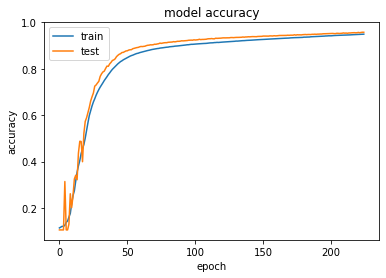

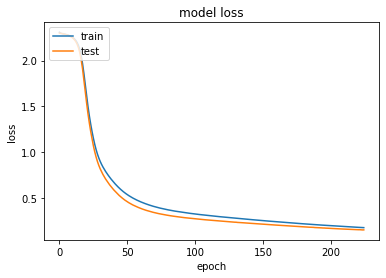

Test loss: 0.1807760123550892
Test accuracy: 0.9472

Model: "model_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_71 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_673 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_674 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_675 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_676 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense

54000/54000 [==============================] - 4s 65us/sample - loss: 2.3013 - acc: 0.1126 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 49/375
54000/54000 [==============================] - 3s 65us/sample - loss: 2.3011 - acc: 0.1131 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 50/375
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3011 - acc: 0.1133 - val_loss: 2.3019 - val_acc: 0.1045
Epoch 51/375
54000/54000 [==============================] - 3s 64us/sample - loss: 2.3011 - acc: 0.1128 - val_loss: 2.3012 - val_acc: 0.1113
Epoch 52/375
54000/54000 [==============================] - 3s 65us/sample - loss: 2.3011 - acc: 0.1132 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 53/375
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3012 - acc: 0.1129 - val_loss: 2.3011 - val_acc: 0.1050
Epoch 54/375
54000/54000 [==============================] - 4s 65us/sample - loss: 2.3012 - acc: 0.1134 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 55/375
54000/54000 [

54000/54000 [==============================] - 3s 65us/sample - loss: 2.2995 - acc: 0.1134 - val_loss: 2.3006 - val_acc: 0.1050
Epoch 107/375
54000/54000 [==============================] - 3s 65us/sample - loss: 2.2995 - acc: 0.1138 - val_loss: 2.3015 - val_acc: 0.1050
Epoch 108/375
54000/54000 [==============================] - 3s 65us/sample - loss: 2.2993 - acc: 0.1146 - val_loss: 2.3007 - val_acc: 0.1050
Epoch 109/375
54000/54000 [==============================] - 3s 65us/sample - loss: 2.2995 - acc: 0.1142 - val_loss: 2.2999 - val_acc: 0.1050
Epoch 110/375
54000/54000 [==============================] - 3s 65us/sample - loss: 2.2992 - acc: 0.1153 - val_loss: 2.2993 - val_acc: 0.1928
Epoch 111/375
54000/54000 [==============================] - 3s 65us/sample - loss: 2.2993 - acc: 0.1154 - val_loss: 2.2998 - val_acc: 0.1050
Epoch 112/375
54000/54000 [==============================] - 3s 64us/sample - loss: 2.2992 - acc: 0.1129 - val_loss: 2.3002 - val_acc: 0.1050
Epoch 113/375
54000/

Epoch 164/375
54000/54000 [==============================] - 3s 65us/sample - loss: 2.0310 - acc: 0.2479 - val_loss: 1.9841 - val_acc: 0.2390
Epoch 165/375
54000/54000 [==============================] - 4s 66us/sample - loss: 1.9540 - acc: 0.2583 - val_loss: 1.9054 - val_acc: 0.2593
Epoch 166/375
54000/54000 [==============================] - 4s 65us/sample - loss: 1.8849 - acc: 0.2720 - val_loss: 1.8399 - val_acc: 0.2920
Epoch 167/375
54000/54000 [==============================] - 3s 65us/sample - loss: 1.8305 - acc: 0.2879 - val_loss: 1.7895 - val_acc: 0.3048
Epoch 168/375
54000/54000 [==============================] - 4s 65us/sample - loss: 1.7901 - acc: 0.3023 - val_loss: 1.7505 - val_acc: 0.3207
Epoch 169/375
54000/54000 [==============================] - 4s 65us/sample - loss: 1.7602 - acc: 0.3133 - val_loss: 1.7245 - val_acc: 0.3212
Epoch 170/375
54000/54000 [==============================] - 4s 65us/sample - loss: 1.7374 - acc: 0.3242 - val_loss: 1.7014 - val_acc: 0.3402
Epoch 

Epoch 222/375
54000/54000 [==============================] - 3s 64us/sample - loss: 1.1349 - acc: 0.6673 - val_loss: 1.0575 - val_acc: 0.7057
Epoch 223/375
54000/54000 [==============================] - 3s 64us/sample - loss: 1.0988 - acc: 0.6756 - val_loss: 1.0197 - val_acc: 0.7070
Epoch 224/375
54000/54000 [==============================] - 3s 64us/sample - loss: 1.0622 - acc: 0.6830 - val_loss: 0.9808 - val_acc: 0.7220
Epoch 225/375
54000/54000 [==============================] - 4s 65us/sample - loss: 1.0275 - acc: 0.6926 - val_loss: 0.9458 - val_acc: 0.7250
Epoch 226/375
54000/54000 [==============================] - 4s 65us/sample - loss: 0.9957 - acc: 0.7001 - val_loss: 0.9160 - val_acc: 0.7338
Epoch 227/375
54000/54000 [==============================] - 4s 65us/sample - loss: 0.9683 - acc: 0.7063 - val_loss: 0.8873 - val_acc: 0.7505
Epoch 228/375
54000/54000 [==============================] - 4s 65us/sample - loss: 0.9437 - acc: 0.7138 - val_loss: 0.8634 - val_acc: 0.7488
Epoch 

Epoch 280/375
54000/54000 [==============================] - 4s 65us/sample - loss: 0.4190 - acc: 0.8876 - val_loss: 0.3734 - val_acc: 0.9052
Epoch 281/375
54000/54000 [==============================] - 3s 65us/sample - loss: 0.4133 - acc: 0.8894 - val_loss: 0.3688 - val_acc: 0.9077
Epoch 282/375
54000/54000 [==============================] - 3s 65us/sample - loss: 0.4076 - acc: 0.8908 - val_loss: 0.3654 - val_acc: 0.9070
Epoch 283/375
54000/54000 [==============================] - 4s 65us/sample - loss: 0.4022 - acc: 0.8922 - val_loss: 0.3622 - val_acc: 0.9080
Epoch 284/375
54000/54000 [==============================] - 3s 65us/sample - loss: 0.3967 - acc: 0.8937 - val_loss: 0.3601 - val_acc: 0.9113
Epoch 285/375
54000/54000 [==============================] - 3s 64us/sample - loss: 0.3924 - acc: 0.8951 - val_loss: 0.3542 - val_acc: 0.9108
Epoch 286/375
54000/54000 [==============================] - 3s 64us/sample - loss: 0.3865 - acc: 0.8969 - val_loss: 0.3474 - val_acc: 0.9128
Epoch 

Epoch 338/375
54000/54000 [==============================] - 4s 67us/sample - loss: 0.2273 - acc: 0.9400 - val_loss: 0.2317 - val_acc: 0.9442
Epoch 339/375
54000/54000 [==============================] - 4s 73us/sample - loss: 0.2253 - acc: 0.9416 - val_loss: 0.2244 - val_acc: 0.9465
Epoch 340/375
54000/54000 [==============================] - 4s 70us/sample - loss: 0.2232 - acc: 0.9418 - val_loss: 0.2241 - val_acc: 0.9480
Epoch 341/375
54000/54000 [==============================] - 4s 66us/sample - loss: 0.2219 - acc: 0.9422 - val_loss: 0.2238 - val_acc: 0.9458
Epoch 342/375
54000/54000 [==============================] - 3s 63us/sample - loss: 0.2200 - acc: 0.9427 - val_loss: 0.2346 - val_acc: 0.9442
Epoch 343/375
54000/54000 [==============================] - 3s 63us/sample - loss: 0.2185 - acc: 0.9431 - val_loss: 0.2337 - val_acc: 0.9437
Epoch 344/375
54000/54000 [==============================] - 4s 67us/sample - loss: 0.2171 - acc: 0.9436 - val_loss: 0.2213 - val_acc: 0.9462
Epoch 

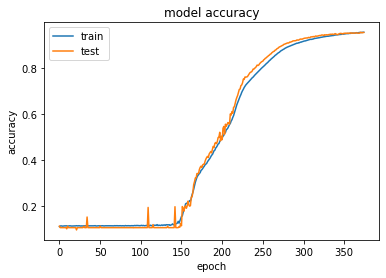

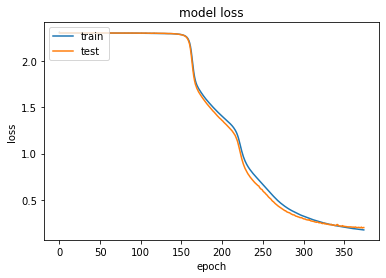

Test loss: 0.22278898642659187
Test accuracy: 0.9419

Model: "model_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_72 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_679 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_680 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_681 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_682 (Dense)            (None, 128)               16512     
_________________________________________________________________
dens

54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1113 - val_loss: 2.3030 - val_acc: 0.1050
Epoch 47/525
54000/54000 [==============================] - 5s 86us/sample - loss: 2.3018 - acc: 0.1127 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 48/525
54000/54000 [==============================] - 5s 85us/sample - loss: 2.3019 - acc: 0.1126 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 49/525
54000/54000 [==============================] - 5s 86us/sample - loss: 2.3019 - acc: 0.1121 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 50/525
54000/54000 [==============================] - 4s 82us/sample - loss: 2.3018 - acc: 0.1131 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 51/525
54000/54000 [==============================] - 4s 80us/sample - loss: 2.3017 - acc: 0.1121 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 52/525
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3020 - acc: 0.1127 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 53/525
54000/54000 [

54000/54000 [==============================] - 4s 80us/sample - loss: 2.3019 - acc: 0.1123 - val_loss: 2.3033 - val_acc: 0.1050
Epoch 105/525
54000/54000 [==============================] - 4s 80us/sample - loss: 2.3018 - acc: 0.1123 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 106/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3018 - acc: 0.1133 - val_loss: 2.3017 - val_acc: 0.1045
Epoch 107/525
54000/54000 [==============================] - 4s 75us/sample - loss: 2.3018 - acc: 0.1130 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 108/525
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3018 - acc: 0.1126 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 109/525
54000/54000 [==============================] - 4s 81us/sample - loss: 2.3016 - acc: 0.1114 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 110/525
54000/54000 [==============================] - 4s 81us/sample - loss: 2.3018 - acc: 0.1123 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 111/525
54000/

Epoch 162/525
54000/54000 [==============================] - 4s 74us/sample - loss: 2.3019 - acc: 0.1122 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 163/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3018 - acc: 0.1120 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 164/525
54000/54000 [==============================] - 5s 87us/sample - loss: 2.3017 - acc: 0.1128 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 165/525
54000/54000 [==============================] - 5s 88us/sample - loss: 2.3019 - acc: 0.1131 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 166/525
54000/54000 [==============================] - 5s 84us/sample - loss: 2.3017 - acc: 0.1128 - val_loss: 2.3032 - val_acc: 0.1050
Epoch 167/525
54000/54000 [==============================] - 5s 84us/sample - loss: 2.3018 - acc: 0.1121 - val_loss: 2.3034 - val_acc: 0.1050
Epoch 168/525
54000/54000 [==============================] - 4s 82us/sample - loss: 2.3017 - acc: 0.1132 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 

Epoch 220/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3018 - acc: 0.1120 - val_loss: 2.3021 - val_acc: 0.1050
Epoch 221/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3019 - acc: 0.1121 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 222/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3016 - acc: 0.1116 - val_loss: 2.3036 - val_acc: 0.1050
Epoch 223/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3017 - acc: 0.1121 - val_loss: 2.3040 - val_acc: 0.1050
Epoch 224/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3019 - acc: 0.1128 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 225/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3016 - acc: 0.1123 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 226/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3017 - acc: 0.1132 - val_loss: 2.3032 - val_acc: 0.1050
Epoch 

Epoch 278/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3018 - acc: 0.1129 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 279/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3036 - val_acc: 0.1050
Epoch 280/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3018 - acc: 0.1132 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 281/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3019 - acc: 0.1126 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 282/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1133 - val_loss: 2.3030 - val_acc: 0.1050
Epoch 283/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3018 - acc: 0.1129 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 284/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1128 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 

Epoch 336/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1131 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 337/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1129 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 338/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3018 - acc: 0.1128 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 339/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1128 - val_loss: 2.3031 - val_acc: 0.1050
Epoch 340/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3018 - acc: 0.1131 - val_loss: 2.3015 - val_acc: 0.1050
Epoch 341/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3016 - acc: 0.1117 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 342/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3016 - acc: 0.1129 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 

Epoch 394/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1125 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 395/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3015 - acc: 0.1122 - val_loss: 2.3042 - val_acc: 0.1050
Epoch 396/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1128 - val_loss: 2.3020 - val_acc: 0.0952
Epoch 397/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1119 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 398/525
54000/54000 [==============================] - 4s 80us/sample - loss: 2.3017 - acc: 0.1123 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 399/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3039 - val_acc: 0.1050
Epoch 400/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1128 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 

Epoch 452/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3016 - acc: 0.1131 - val_loss: 2.3016 - val_acc: 0.1113
Epoch 453/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3016 - acc: 0.1116 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 454/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3018 - acc: 0.1127 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 455/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3021 - val_acc: 0.1113
Epoch 456/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1126 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 457/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1131 - val_loss: 2.3029 - val_acc: 0.1050
Epoch 458/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1132 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 

Epoch 510/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3016 - acc: 0.1132 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 511/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1131 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 512/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1129 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 513/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1130 - val_loss: 2.3027 - val_acc: 0.1050
Epoch 514/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1131 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 515/525
54000/54000 [==============================] - 4s 79us/sample - loss: 2.3017 - acc: 0.1126 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 516/525
54000/54000 [==============================] - 4s 78us/sample - loss: 2.3016 - acc: 0.1129 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 

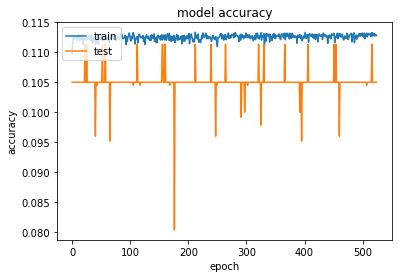

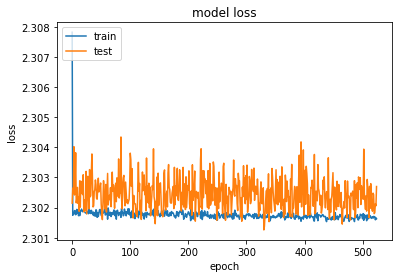

Test loss: 2.3017867794036864
Test accuracy: 0.1135


In [106]:
num_units = [32, 64, 128]
num_hidden_layers = [2, 3, 5, 7]
case_4_performances = []
case_4_models = []

for N in num_units:
    for L in num_hidden_layers:
        print()
        model = create_dense([N]*L)
        performance = evaluate(model, epochs=L*75)
        performance['epochs'] = L*75
        performance['number of hidden units'] = N
        performance['number of hidden layers'] = L
        case_4_models.append(model)
        case_4_performances.append(performance)

Notes on models:
- 32 units per hidden layer / 2 hidden layers: 26,506 trainable params, high increase until epoch 20-40, slow but steady increase until epoch 150, Test accuracy: 0.9331
- 32 units per hidden layer / 3 hidden layers: 27,562 trainable params, high increase until epoch 50-75, slow but steady increase until epoch 225, Test accuracy: 0.9421
- 32 units per hidden layer / 5 hidden layers: 29,674 trainable params, high increase until epoch 375 - training definitely stopped to early, Test accuracy: 0.8291
- 32 units per hidden layer / 7 hidden layers: 31,786 trainable params, no increase until epoch 525, Test accuracy: 0.1135
- 64 units per hidden layer / 2 hidden layers: 55,050 trainable params, high increase until epoch 20-40, slow but steady increase until epoch 150, Test accuracy: 0.9398
- 64 units per hidden layer / 3 hidden layers: 59,210 trainable params, high increase until epoch 50-75, slow but steady increase until epoch 225, Test accuracy: 0.9466
- 64 units per hidden layer / 5 hidden layers: 67,530 trainable params, high increase until epoch 325-350 - slower but steady increase until epoch 375, possibly stopped to early, Test accuracy: 0.9058
- 64 unit units per hidden layer / 7 hidden layers: 75,850 trainable params, no increase until epoch 525, Test accuracy: 0.1135
- 128 units per hidden layer / 2 hidden layers: 118,282 trainable params, high increase until epoch 20-40, slow but steady increase until epoch 150, Test accuracy: 0.9345
- 128 units per hidden layer / 3 hidden layers: 134,794 trainable params, high increase until epoch 50-75, slow but steady increase until epoch 225, Test accuracy: 0.9472
- 128 units per hidden layer / 5 hidden layers: 167,818 trainable params, high increase until epoch 350-300 - slower but steady increase until epoch 375, Test accuracy: 0.9419
- 128 unit units per hidden layer / 7 hidden layers: 200,842 trainable params, no increase until epoch 525, Test accuracy: 0.1135

In [107]:
# show model performance per number of nodes and per number of hidden layers in table
pd.DataFrame(case_4_performances).sort_values(by=['test accuracy'], ascending=False)

,test loss,test accuracy,train loss,train accuracy,val loss,val accuracy,number of hidden units,number of hidden layers
9,0.180776,0.9472,0.178955,0.949167,0.154572,0.957333,128,3
5,0.186163,0.9466,0.177582,0.949815,0.158746,0.957333,64,3
1,0.213867,0.9421,0.203353,0.944370,0.184681,0.950333,32,3
10,0.222789,0.9419,0.176366,0.954019,0.201672,0.953167,128,5
4,0.210335,0.9398,0.214813,0.937481,0.179469,0.950167,64,2
8,0.222486,0.9345,0.227718,0.933759,0.188976,0.946500,128,2
0,0.231910,0.9331,0.237152,0.933315,0.200632,0.945667,32,2
6,0.404007,0.9058,0.370754,0.909833,0.345139,0.921000,64,5
2,0.745381,0.8291,0.706034,0.841944,0.696615,0.836000,32,5
3,2.301142,0.1135,2.301318,0.113185,2.302267,0.105000,32,7


In [130]:
num_units = [32, 64, 128]
num_hidden_layers = [2, 3, 5, 7]

[[0.9331 0.9421 0.8291 0.1135]
 [0.9398 0.9466 0.9058 0.1135]
 [0.9345 0.9472 0.9419 0.1135]]
[32, 64, 128]


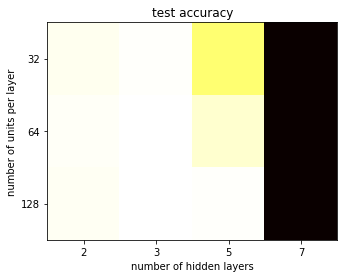

In [131]:
# plot model performance in heat map
a = np.array([p['test accuracy'] for p in case_4_performances])
a = a.reshape((3,4))
print(a)
plt.imshow(a, cmap='hot', interpolation='nearest')
print(num_units)
plt.yticks(ticks=[i for i,count in enumerate(num_units)], labels = num_units)
plt.xticks(ticks=[i for i,count in enumerate(num_hidden_layers)], labels = num_hidden_layers)
plt.title('test accuracy')
plt.xlabel('number of hidden layers')
plt.ylabel('number of units per layer')
plt.show()

##### Results and findings - Task 2 / Case 4
Model performance is best for models with 3 layers, however it is very close for models with 2 and 5 layers, considering that the training runs for the models with 32 and 64 hidden units per layer and 5 layers were probably to short. The model performance for any model with 7 layers did not improve during the training (525 epochs for 7 layers).

### Task 3: Document answers to the following questions:
How can you improve the models built in Task 1 and Task 2?

Answer: *It looks like model performance is really close for all models as long as they are trained sufficiently long. There aren't any signs of overfitting, though the model performance increase for more complex models is relatively small and doesn't seem to justify the complexity. It seems like more hidden units per layer improves the number of epoch needed to train a deeper model.*

Will hyper-parameter optimization help in increasing the accuracy? If yes, implement the changes and report your results. 

Answer: *Yes, we can try to optimize the number of hidden layers, number of units per hidden layer, the epochs and batch size in the area where previous experiments already showed promising results. As we have already tried different values for the numbers of hidden layers, number of units per hidden layer and epochs in the previous task, I will focus on the batch size.*
 
Train and evaluate the network based on your answers to the questions above. Document the quality metrics and include the findings in your Jupyter Notebook. 

In [125]:
# parameter space
p = {
     'hidden_layers':  [3], #[1, 2, 3, 5, 10],
     'num_units': [128],  #[32, 48, 64, 92],
     'batch_size': [64, 128, 256],
     'epochs': [5], #[5,10,100]
} 


Model: "model_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_75 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_74 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_689 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_690 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_691 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_692 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
____________________________________________________

54000/54000 [==============================] - 4s 76us/sample - loss: 0.3365 - acc: 0.9053 - val_loss: 0.2820 - val_acc: 0.9208
Epoch 51/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.3319 - acc: 0.9064 - val_loss: 0.2785 - val_acc: 0.9223
Epoch 52/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.3274 - acc: 0.9073 - val_loss: 0.2749 - val_acc: 0.9245
Epoch 53/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.3231 - acc: 0.9086 - val_loss: 0.2709 - val_acc: 0.9235
Epoch 54/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.3189 - acc: 0.9097 - val_loss: 0.2683 - val_acc: 0.9257
Epoch 55/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.3149 - acc: 0.9101 - val_loss: 0.2638 - val_acc: 0.9265
Epoch 56/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.3111 - acc: 0.9114 - val_loss: 0.2605 - val_acc: 0.9262
Epoch 57/230
54000/54000 [

54000/54000 [==============================] - 4s 77us/sample - loss: 0.1804 - acc: 0.9483 - val_loss: 0.1525 - val_acc: 0.9578
Epoch 109/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1787 - acc: 0.9495 - val_loss: 0.1507 - val_acc: 0.9597
Epoch 110/230
54000/54000 [==============================] - 4s 75us/sample - loss: 0.1771 - acc: 0.9497 - val_loss: 0.1497 - val_acc: 0.9580
Epoch 111/230
54000/54000 [==============================] - 4s 74us/sample - loss: 0.1756 - acc: 0.9502 - val_loss: 0.1481 - val_acc: 0.9588
Epoch 112/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1740 - acc: 0.9509 - val_loss: 0.1474 - val_acc: 0.9590
Epoch 113/230
54000/54000 [==============================] - 4s 75us/sample - loss: 0.1725 - acc: 0.9511 - val_loss: 0.1469 - val_acc: 0.9597
Epoch 114/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1711 - acc: 0.9520 - val_loss: 0.1449 - val_acc: 0.9608
Epoch 115/230
54000/

Epoch 166/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1150 - acc: 0.9675 - val_loss: 0.1109 - val_acc: 0.9683
Epoch 167/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1144 - acc: 0.9677 - val_loss: 0.1119 - val_acc: 0.9687
Epoch 168/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1136 - acc: 0.9678 - val_loss: 0.1090 - val_acc: 0.9687
Epoch 169/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1129 - acc: 0.9682 - val_loss: 0.1108 - val_acc: 0.9682
Epoch 170/230
54000/54000 [==============================] - 4s 75us/sample - loss: 0.1121 - acc: 0.9683 - val_loss: 0.1099 - val_acc: 0.9680
Epoch 171/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1113 - acc: 0.9685 - val_loss: 0.1101 - val_acc: 0.9687
Epoch 172/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1106 - acc: 0.9691 - val_loss: 0.1080 - val_acc: 0.9685
Epoch 

Epoch 224/230
54000/54000 [==============================] - 4s 75us/sample - loss: 0.0803 - acc: 0.9779 - val_loss: 0.0957 - val_acc: 0.9725
Epoch 225/230
54000/54000 [==============================] - 4s 75us/sample - loss: 0.0798 - acc: 0.9776 - val_loss: 0.0974 - val_acc: 0.9725
Epoch 226/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.0794 - acc: 0.9777 - val_loss: 0.0958 - val_acc: 0.9732
Epoch 227/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.0790 - acc: 0.9782 - val_loss: 0.0946 - val_acc: 0.9725
Epoch 228/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.0785 - acc: 0.9784 - val_loss: 0.0958 - val_acc: 0.9728
Epoch 229/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.0780 - acc: 0.9785 - val_loss: 0.0955 - val_acc: 0.9728
Epoch 230/230
54000/54000 [==============================] - 4s 76us/sample - loss: 0.0776 - acc: 0.9784 - val_loss: 0.0941 - val_acc: 0.9733
dict_k

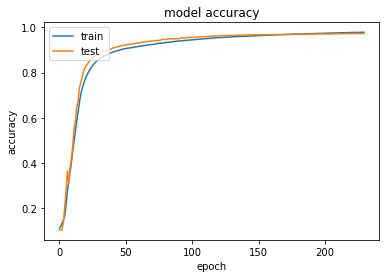

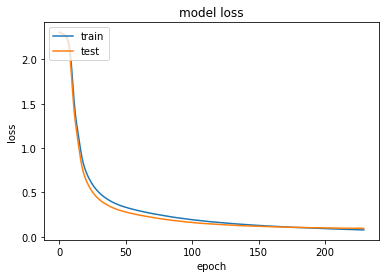

Test loss: 0.10472929358258844
Test accuracy: 0.9702
Model: "model_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_76 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_75 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_693 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_694 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_695 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_696 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0

54000/54000 [==============================] - 3s 53us/sample - loss: 0.6210 - acc: 0.8212 - val_loss: 0.5406 - val_acc: 0.8563
Epoch 51/230
54000/54000 [==============================] - 3s 52us/sample - loss: 0.6071 - acc: 0.8265 - val_loss: 0.5277 - val_acc: 0.8612
Epoch 52/230
54000/54000 [==============================] - 3s 59us/sample - loss: 0.5934 - acc: 0.8320 - val_loss: 0.5141 - val_acc: 0.8658
Epoch 53/230
54000/54000 [==============================] - 3s 53us/sample - loss: 0.5803 - acc: 0.8361 - val_loss: 0.5014 - val_acc: 0.8680
Epoch 54/230
54000/54000 [==============================] - 3s 56us/sample - loss: 0.5674 - acc: 0.8403 - val_loss: 0.4893 - val_acc: 0.8728
Epoch 55/230
54000/54000 [==============================] - 3s 53us/sample - loss: 0.5550 - acc: 0.8449 - val_loss: 0.4774 - val_acc: 0.8757
Epoch 56/230
54000/54000 [==============================] - 3s 53us/sample - loss: 0.5432 - acc: 0.8482 - val_loss: 0.4658 - val_acc: 0.8793
Epoch 57/230
54000/54000 [

54000/54000 [==============================] - 3s 47us/sample - loss: 0.3199 - acc: 0.9079 - val_loss: 0.2685 - val_acc: 0.9255
Epoch 109/230
54000/54000 [==============================] - 3s 47us/sample - loss: 0.3182 - acc: 0.9085 - val_loss: 0.2675 - val_acc: 0.9250
Epoch 110/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3164 - acc: 0.9085 - val_loss: 0.2659 - val_acc: 0.9262
Epoch 111/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3147 - acc: 0.9092 - val_loss: 0.2644 - val_acc: 0.9255
Epoch 112/230
54000/54000 [==============================] - 3s 49us/sample - loss: 0.3130 - acc: 0.9098 - val_loss: 0.2633 - val_acc: 0.9267
Epoch 113/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3113 - acc: 0.9104 - val_loss: 0.2614 - val_acc: 0.9270
Epoch 114/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3097 - acc: 0.9110 - val_loss: 0.2600 - val_acc: 0.9273
Epoch 115/230
54000/

Epoch 166/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2369 - acc: 0.9323 - val_loss: 0.1996 - val_acc: 0.9450
Epoch 167/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2356 - acc: 0.9322 - val_loss: 0.1990 - val_acc: 0.9453
Epoch 168/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2345 - acc: 0.9327 - val_loss: 0.1978 - val_acc: 0.9452
Epoch 169/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2334 - acc: 0.9333 - val_loss: 0.1968 - val_acc: 0.9470
Epoch 170/230
54000/54000 [==============================] - 3s 49us/sample - loss: 0.2322 - acc: 0.9334 - val_loss: 0.1958 - val_acc: 0.9467
Epoch 171/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2310 - acc: 0.9338 - val_loss: 0.1947 - val_acc: 0.9470
Epoch 172/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2298 - acc: 0.9341 - val_loss: 0.1940 - val_acc: 0.9472
Epoch 

Epoch 224/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.1799 - acc: 0.9489 - val_loss: 0.1545 - val_acc: 0.9583
Epoch 225/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.1791 - acc: 0.9491 - val_loss: 0.1538 - val_acc: 0.9587
Epoch 226/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.1783 - acc: 0.9492 - val_loss: 0.1530 - val_acc: 0.9585
Epoch 227/230
54000/54000 [==============================] - 3s 49us/sample - loss: 0.1776 - acc: 0.9498 - val_loss: 0.1528 - val_acc: 0.9592
Epoch 228/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.1768 - acc: 0.9500 - val_loss: 0.1522 - val_acc: 0.9590
Epoch 229/230
54000/54000 [==============================] - 3s 50us/sample - loss: 0.1760 - acc: 0.9500 - val_loss: 0.1518 - val_acc: 0.9598
Epoch 230/230
54000/54000 [==============================] - 3s 49us/sample - loss: 0.1753 - acc: 0.9501 - val_loss: 0.1509 - val_acc: 0.9588
dict_k

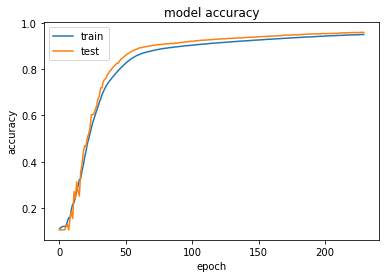

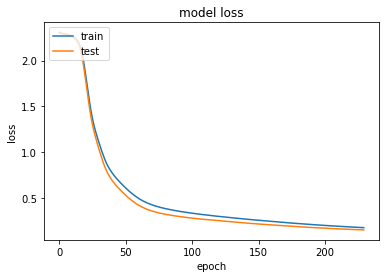

Test loss: 0.17693176169097424
Test accuracy: 0.949
Model: "model_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_77 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_76 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_697 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_698 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_699 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_700 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0


54000/54000 [==============================] - 2s 28us/sample - loss: 1.2010 - acc: 0.6158 - val_loss: 1.1430 - val_acc: 0.6570
Epoch 51/230
54000/54000 [==============================] - 2s 28us/sample - loss: 1.1741 - acc: 0.6254 - val_loss: 1.1150 - val_acc: 0.6723
Epoch 52/230
54000/54000 [==============================] - 2s 28us/sample - loss: 1.1475 - acc: 0.6356 - val_loss: 1.0860 - val_acc: 0.6820
Epoch 53/230
54000/54000 [==============================] - 2s 28us/sample - loss: 1.1211 - acc: 0.6456 - val_loss: 1.0580 - val_acc: 0.6972
Epoch 54/230
54000/54000 [==============================] - 2s 28us/sample - loss: 1.0950 - acc: 0.6544 - val_loss: 1.0304 - val_acc: 0.7053
Epoch 55/230
54000/54000 [==============================] - 2s 28us/sample - loss: 1.0693 - acc: 0.6642 - val_loss: 1.0028 - val_acc: 0.7180
Epoch 56/230
54000/54000 [==============================] - 2s 28us/sample - loss: 1.0441 - acc: 0.6740 - val_loss: 0.9760 - val_acc: 0.7242
Epoch 57/230
54000/54000 [

54000/54000 [==============================] - 2s 28us/sample - loss: 0.5330 - acc: 0.8493 - val_loss: 0.4594 - val_acc: 0.8752
Epoch 109/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.5293 - acc: 0.8503 - val_loss: 0.4559 - val_acc: 0.8755
Epoch 110/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.5256 - acc: 0.8511 - val_loss: 0.4523 - val_acc: 0.8770
Epoch 111/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.5220 - acc: 0.8521 - val_loss: 0.4488 - val_acc: 0.8775
Epoch 112/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.5185 - acc: 0.8532 - val_loss: 0.4456 - val_acc: 0.8787
Epoch 113/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.5150 - acc: 0.8544 - val_loss: 0.4427 - val_acc: 0.8790
Epoch 114/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.5117 - acc: 0.8552 - val_loss: 0.4393 - val_acc: 0.8802
Epoch 115/230
54000/

Epoch 166/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3929 - acc: 0.8898 - val_loss: 0.3324 - val_acc: 0.9077
Epoch 167/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3913 - acc: 0.8899 - val_loss: 0.3307 - val_acc: 0.9070
Epoch 168/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3896 - acc: 0.8904 - val_loss: 0.3293 - val_acc: 0.9083
Epoch 169/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3880 - acc: 0.8905 - val_loss: 0.3279 - val_acc: 0.9087
Epoch 170/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3863 - acc: 0.8911 - val_loss: 0.3264 - val_acc: 0.9082
Epoch 171/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3846 - acc: 0.8915 - val_loss: 0.3250 - val_acc: 0.9088
Epoch 172/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3831 - acc: 0.8918 - val_loss: 0.3237 - val_acc: 0.9097
Epoch 

Epoch 224/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3183 - acc: 0.9087 - val_loss: 0.2682 - val_acc: 0.9252
Epoch 225/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3173 - acc: 0.9091 - val_loss: 0.2673 - val_acc: 0.9252
Epoch 226/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3163 - acc: 0.9091 - val_loss: 0.2663 - val_acc: 0.9257
Epoch 227/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3153 - acc: 0.9097 - val_loss: 0.2656 - val_acc: 0.9257
Epoch 228/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3144 - acc: 0.9101 - val_loss: 0.2648 - val_acc: 0.9268
Epoch 229/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3134 - acc: 0.9101 - val_loss: 0.2641 - val_acc: 0.9262
Epoch 230/230
54000/54000 [==============================] - 2s 28us/sample - loss: 0.3124 - acc: 0.9107 - val_loss: 0.2631 - val_acc: 0.9265
dict_k

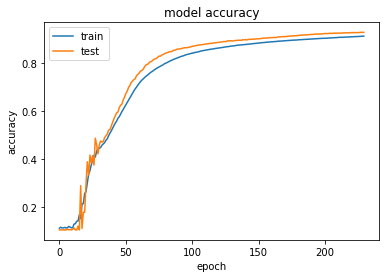

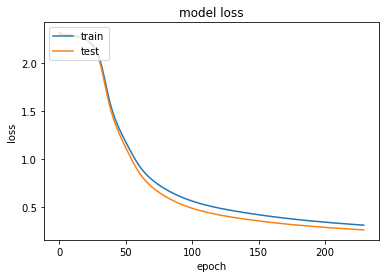

Test loss: 0.30393455792069435
Test accuracy: 0.9131


In [126]:
# init list of models and performances
task_3_models = []
task_3_performances = []

# train and evaluate different models
for num_layers in p['hidden_layers']:
    for num_units in p['num_units']:
        for epochs in p['epochs']:
            epochs = 75 * num_layers + epochs  # allow deeper networks to train longer
            for batch_size in p['batch_size']:
                model = create_dense([num_units]*num_layers)
                performance = evaluate(model, epochs=epochs, batch_size=batch_size)
                performance['number of hidden units'] = num_units
                performance['number of hidden layers'] = num_layers
                performance['epochs'] = epochs
                performance['batch size'] = batch_size
                task_3_models.append(model)
                task_3_performances.append(performance)
                

In [127]:
pd.DataFrame(task_3_performances).sort_values(by=['test accuracy'], ascending=False)

,test loss,test accuracy,train loss,train accuracy,val loss,val accuracy,number of hidden units,number of hidden layers,epochs,batch size
0,0.104729,0.9702,0.077552,0.978407,0.094126,0.973333,128,3,230,64
1,0.176932,0.9490,0.175278,0.950148,0.150939,0.958833,128,3,230,128
2,0.303935,0.9131,0.312445,0.910722,0.263146,0.926500,128,3,230,256


##### Results and findings - Task 3
Decreasing the batch size allowed to improve model performance by more than 2%. Possiblle next steps could be to try different smaller batch sizes and also see if model performance improves for other architectures.

### Task 4: In this task you are free to change any parameter/architecture to improve the quality metrics. This is the time to get creative!
After training and evaluating the network, document the quality metrics for each change and include the findings in your Jupyter Notebook.

#### Hypothesis: Centering input variables should improve model accuracy
Description: My project partner observed that centering input variables helped improving the performance of the one hidden layer network.

Input:
- Data set: Input data set centered around zero
- Number of nodes per layer: 128
- Number of hidden layers: 3
- Output change: The test accuracy should improve
- Change reason: Centering data in the hyperplane origin may improve optimization


In [132]:
# center around zero
x_train -= 0.5
x_test -= 0.5

Model: "model_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_78 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_705 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_706 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_707 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_708 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
____________________________________________________

54000/54000 [==============================] - 5s 89us/sample - loss: 0.3461 - acc: 0.9011 - val_loss: 0.2903 - val_acc: 0.9200
Epoch 51/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.3414 - acc: 0.9025 - val_loss: 0.2863 - val_acc: 0.9210
Epoch 52/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.3368 - acc: 0.9041 - val_loss: 0.2825 - val_acc: 0.9230
Epoch 53/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.3326 - acc: 0.9049 - val_loss: 0.2796 - val_acc: 0.9253
Epoch 54/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.3283 - acc: 0.9066 - val_loss: 0.2764 - val_acc: 0.9253
Epoch 55/200
54000/54000 [==============================] - 5s 84us/sample - loss: 0.3241 - acc: 0.9073 - val_loss: 0.2731 - val_acc: 0.9262
Epoch 56/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.3200 - acc: 0.9079 - val_loss: 0.2680 - val_acc: 0.9273
Epoch 57/200
54000/54000 [

54000/54000 [==============================] - 5s 84us/sample - loss: 0.1875 - acc: 0.9470 - val_loss: 0.1588 - val_acc: 0.9583
Epoch 109/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.1858 - acc: 0.9473 - val_loss: 0.1579 - val_acc: 0.9580
Epoch 110/200
54000/54000 [==============================] - 4s 81us/sample - loss: 0.1840 - acc: 0.9479 - val_loss: 0.1576 - val_acc: 0.9580
Epoch 111/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.1822 - acc: 0.9480 - val_loss: 0.1558 - val_acc: 0.9587
Epoch 112/200
54000/54000 [==============================] - 4s 82us/sample - loss: 0.1808 - acc: 0.9488 - val_loss: 0.1532 - val_acc: 0.9600
Epoch 113/200
54000/54000 [==============================] - 4s 82us/sample - loss: 0.1791 - acc: 0.9489 - val_loss: 0.1530 - val_acc: 0.9595
Epoch 114/200
54000/54000 [==============================] - 4s 81us/sample - loss: 0.1775 - acc: 0.9494 - val_loss: 0.1515 - val_acc: 0.9597
Epoch 115/200
54000/

Epoch 166/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.1175 - acc: 0.9668 - val_loss: 0.1132 - val_acc: 0.9687
Epoch 167/200
54000/54000 [==============================] - 5s 84us/sample - loss: 0.1166 - acc: 0.9673 - val_loss: 0.1145 - val_acc: 0.9692
Epoch 168/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.1160 - acc: 0.9674 - val_loss: 0.1124 - val_acc: 0.9690
Epoch 169/200
54000/54000 [==============================] - 4s 82us/sample - loss: 0.1150 - acc: 0.9677 - val_loss: 0.1107 - val_acc: 0.9688
Epoch 170/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.1142 - acc: 0.9677 - val_loss: 0.1101 - val_acc: 0.9687
Epoch 171/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.1135 - acc: 0.9674 - val_loss: 0.1129 - val_acc: 0.9690
Epoch 172/200
54000/54000 [==============================] - 4s 83us/sample - loss: 0.1127 - acc: 0.9681 - val_loss: 0.1089 - val_acc: 0.9695
Epoch 

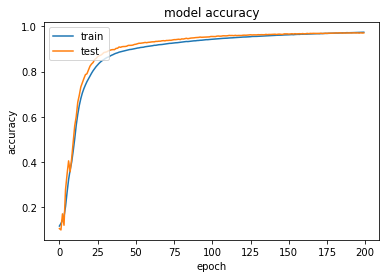

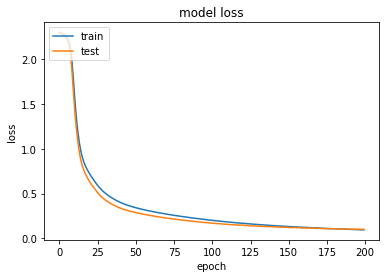

Test loss: 0.1118060526881367
Test accuracy: 0.9676


In [134]:
# parameter space
p = {
     'hidden_layers':  [3], #[1, 2, 3, 5, 10],
     'num_units': [128],  #[32, 48, 64, 92],
     'batch_size': [64], # 128, 256],
     'epochs': [200], #[5,10,100]
} 


# train and evaluate different models
for num_layers in p['hidden_layers']:
    for num_units in p['num_units']:
        for epochs in p['epochs']:
            epochs = 0 * num_layers + epochs  # allow deeper networks to train longer
            for batch_size in p['batch_size']:
                model = create_dense([num_units]*num_layers)
                performance = evaluate(model, epochs=epochs, batch_size=batch_size)
                performance['number of hidden units'] = num_units
                performance['number of hidden layers'] = num_layers
                performance['epochs'] = epochs
                performance['batch size'] = batch_size

Model: "model_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_78 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_705 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_706 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_707 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_708 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
____________________________________________________

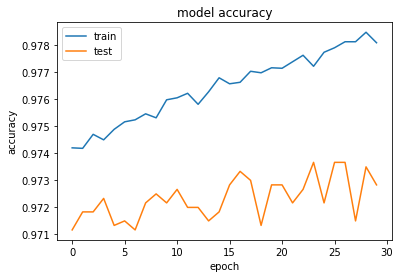

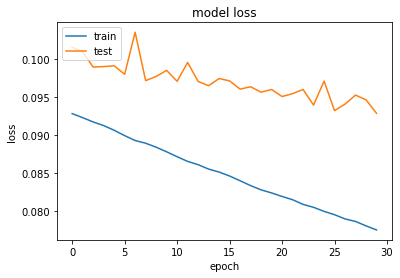

Test loss: 0.10154659999199211
Test accuracy: 0.969


In [135]:
performance = evaluate(model, epochs=30)

In [136]:
# un-center around zero
x_train += 0.5
x_test += 0.5

Output:
- Results: Test accuracy was 0.969 after 230 epochs (compared to 0.9702 without centering). Validation accuracy of 0.2782 after 5 epochs (compared to 0.2092 without centering)
- Changes in results: Final test performance did not improve, however performance improved slightly faster in the beginning.
- Reasoning: I believe the centering does not have a huge impact as we let the network train for a long time. Another possible reason could be that the network is deep enough to take care of preprocessing (this could be tested redoing the same experiment for a shallow network with only one hidden layer).

#### Hypothesis: A smaller batch size may allow training deeper models
Description: As we observed improved test accuracy by choosing a smaller batch size, a smaller batch size might also help training deeper model.

Input:
- Number of nodes per layer: 128
- Number of hidden layers: 7
- Batch size: 32 and 64
- Output change: The accuracy should go up during training instead of stagnating around 0.1135
- Change reason: Smaller batch sizes allow higher agility during training and may lead to better exploration of the hyperplane



In [138]:
# parameter space
p = {
     'hidden_layers':  [7], #[1, 2, 3, 5, 10],
     'num_units': [128],  #[32, 48, 64, 92],
     'batch_size': [32, 64], # 128, 256],
     'epochs': [100], #[5,10,100]
} 


# train and evaluate different models
for num_layers in p['hidden_layers']:
    for num_units in p['num_units']:
        for epochs in p['epochs']:
            epochs = 20 * num_layers + epochs  # allow deeper networks to train longer
            for batch_size in p['batch_size']:
                model_7_layers = create_dense([num_units]*num_layers)
                performance = evaluate(model, epochs=epochs)
                performance['number of hidden units'] = num_units
                performance['number of hidden layers'] = num_layers
                performance['epochs'] = epochs
                performance['batch size'] = batch_size

Model: "model_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_80 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_79 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_709 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_710 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_711 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_712 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_713 (Dense)            (None, 128)               165

54000/54000 [==============================] - 10s 183us/sample - loss: 2.3032 - acc: 0.1096 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 47/440
54000/54000 [==============================] - 10s 182us/sample - loss: 2.3030 - acc: 0.1104 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 48/440
54000/54000 [==============================] - 10s 180us/sample - loss: 2.3030 - acc: 0.1087 - val_loss: 2.3041 - val_acc: 0.1050
Epoch 49/440
54000/54000 [==============================] - 10s 180us/sample - loss: 2.3028 - acc: 0.1087 - val_loss: 2.3044 - val_acc: 0.1045
Epoch 50/440
54000/54000 [==============================] - 10s 182us/sample - loss: 2.3030 - acc: 0.1087 - val_loss: 2.3040 - val_acc: 0.1050
Epoch 51/440
54000/54000 [==============================] - 11s 198us/sample - loss: 2.3028 - acc: 0.1098 - val_loss: 2.3035 - val_acc: 0.1050
Epoch 52/440
54000/54000 [==============================] - 10s 182us/sample - loss: 2.3031 - acc: 0.1100 - val_loss: 2.3035 - val_acc: 0.1050
Epoch 53/440

54000/54000 [==============================] - 10s 188us/sample - loss: 2.3023 - acc: 0.1110 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 104/440
54000/54000 [==============================] - 10s 188us/sample - loss: 2.3021 - acc: 0.1114 - val_loss: 2.3024 - val_acc: 0.1113
Epoch 105/440
54000/54000 [==============================] - 10s 188us/sample - loss: 2.3023 - acc: 0.1111 - val_loss: 2.3016 - val_acc: 0.1113
Epoch 106/440
54000/54000 [==============================] - 10s 188us/sample - loss: 2.3023 - acc: 0.1126 - val_loss: 2.3018 - val_acc: 0.1113
Epoch 107/440
54000/54000 [==============================] - 10s 177us/sample - loss: 2.3021 - acc: 0.1113 - val_loss: 2.3025 - val_acc: 0.1045
Epoch 108/440
54000/54000 [==============================] - 10s 177us/sample - loss: 2.3023 - acc: 0.1101 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 109/440
54000/54000 [==============================] - 10s 178us/sample - loss: 2.3022 - acc: 0.1105 - val_loss: 2.3031 - val_acc: 0.1050
Epoch 

54000/54000 [==============================] - 10s 178us/sample - loss: 2.3020 - acc: 0.1130 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 161/440
54000/54000 [==============================] - 10s 177us/sample - loss: 2.3018 - acc: 0.1118 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 162/440
54000/54000 [==============================] - 9s 175us/sample - loss: 2.3018 - acc: 0.1120 - val_loss: 2.3029 - val_acc: 0.1050
Epoch 163/440
54000/54000 [==============================] - 10s 179us/sample - loss: 2.3017 - acc: 0.1130 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 164/440
54000/54000 [==============================] - 9s 174us/sample - loss: 2.3019 - acc: 0.1127 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 165/440
54000/54000 [==============================] - 9s 174us/sample - loss: 2.3018 - acc: 0.1121 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 166/440
54000/54000 [==============================] - 10s 182us/sample - loss: 2.3019 - acc: 0.1124 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 167

KeyboardInterrupt: 

Model: "model_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_80 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_79 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_709 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_710 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_711 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_712 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_713 (Dense)            (None, 128)               165

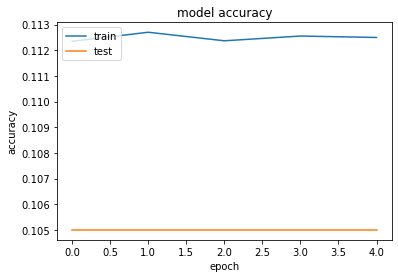

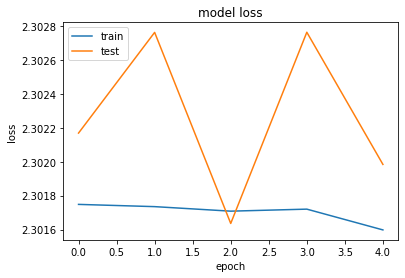

Test loss: 2.301451435470581
Test accuracy: 0.1135


In [143]:
# train some more epochs

performance = evaluate(model_7_layers, epochs=5)

Output:
- Results: Test accuracy of 0.1135
- Changes in results: No increase of test accuracy until epoch 200
- Reasoning: Gradients are vanishing when model is too deep

#### Hypothesis: Centering input variables might allow to train deeper models
Description: As we observed improved test accuracy by choosing a smaller batch size, as smaller batch size might also help training deeper model.

Input:
- Number of nodes per layer: 128
- Number of hidden layers: 7
- Batch size: 64
- Data set: centered around zero
- Output change: The accuracy should go up during training instead of stagnating around 0.1135
- Change reason: Centering data around the origin may improve optimization

In [146]:
# center around zero
x_train -= 0.5
x_test -= 0.5

In [147]:
# parameter space
p = {
     'hidden_layers':  [7], #[1, 2, 3, 5, 10],
     'num_units': [128],  #[32, 48, 64, 92],
     'batch_size': [64], # 128, 256],
     'epochs': [150], #[5,10,100]
} 


# train and evaluate different models
for num_layers in p['hidden_layers']:
    for num_units in p['num_units']:
        for epochs in p['epochs']:
            epochs = 20 * num_layers + epochs  # allow deeper networks to train longer
            for batch_size in p['batch_size']:
                model = create_dense([num_units]*num_layers)
                performance = evaluate(model, epochs=epochs)
                performance['number of hidden units'] = num_units
                performance['number of hidden layers'] = num_layers
                performance['epochs'] = epochs
                performance['batch size'] = batch_size

Model: "model_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_81 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_80 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_717 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_718 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_719 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_720 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_721 (Dense)            (None, 128)               165

Epoch 47/290
54000/54000 [==============================] - 5s 89us/sample - loss: 2.3019 - acc: 0.1118 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 48/290
54000/54000 [==============================] - 5s 90us/sample - loss: 2.3019 - acc: 0.1118 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 49/290
54000/54000 [==============================] - 5s 85us/sample - loss: 2.3017 - acc: 0.1126 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 50/290
54000/54000 [==============================] - 5s 84us/sample - loss: 2.3017 - acc: 0.1118 - val_loss: 2.3023 - val_acc: 0.1050
Epoch 51/290
54000/54000 [==============================] - 5s 84us/sample - loss: 2.3018 - acc: 0.1122 - val_loss: 2.3032 - val_acc: 0.1050
Epoch 52/290
54000/54000 [==============================] - 5s 84us/sample - loss: 2.3017 - acc: 0.1120 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 53/290
54000/54000 [==============================] - 5s 83us/sample - loss: 2.3019 - acc: 0.1125 - val_loss: 2.3030 - val_acc: 0.1050
Epoch 54/290


54000/54000 [==============================] - 5s 84us/sample - loss: 2.3018 - acc: 0.1120 - val_loss: 2.3033 - val_acc: 0.1050
Epoch 106/290
54000/54000 [==============================] - 4s 83us/sample - loss: 2.3017 - acc: 0.1119 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 107/290
54000/54000 [==============================] - 4s 83us/sample - loss: 2.3018 - acc: 0.1130 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 108/290
54000/54000 [==============================] - 4s 83us/sample - loss: 2.3017 - acc: 0.1122 - val_loss: 2.3024 - val_acc: 0.1050
Epoch 109/290
54000/54000 [==============================] - 4s 83us/sample - loss: 2.3017 - acc: 0.1125 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 110/290
54000/54000 [==============================] - 4s 83us/sample - loss: 2.3017 - acc: 0.1128 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 111/290
54000/54000 [==============================] - 4s 83us/sample - loss: 2.3019 - acc: 0.1122 - val_loss: 2.3019 - val_acc: 0.1050
Epoch 112/290
54000/

Epoch 163/290
54000/54000 [==============================] - 4s 83us/sample - loss: 2.3019 - acc: 0.1132 - val_loss: 2.3018 - val_acc: 0.1050
Epoch 164/290
54000/54000 [==============================] - 4s 81us/sample - loss: 2.3018 - acc: 0.1128 - val_loss: 2.3025 - val_acc: 0.1050
Epoch 165/290
54000/54000 [==============================] - 4s 82us/sample - loss: 2.3017 - acc: 0.1121 - val_loss: 2.3028 - val_acc: 0.1050
Epoch 166/290
54000/54000 [==============================] - 4s 82us/sample - loss: 2.3017 - acc: 0.1131 - val_loss: 2.3030 - val_acc: 0.1050
Epoch 167/290
54000/54000 [==============================] - 4s 82us/sample - loss: 2.3017 - acc: 0.1127 - val_loss: 2.3020 - val_acc: 0.1050
Epoch 168/290
54000/54000 [==============================] - 4s 81us/sample - loss: 2.3017 - acc: 0.1120 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 169/290
54000/54000 [==============================] - 4s 77us/sample - loss: 2.3016 - acc: 0.1126 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 

KeyboardInterrupt: 

Model: "model_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_81 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_80 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_717 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_718 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_719 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_720 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_721 (Dense)            (None, 128)               165

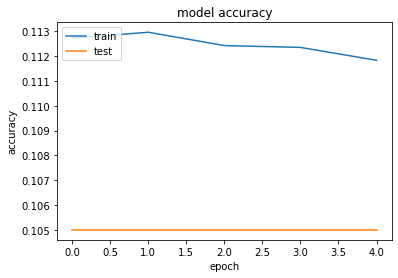

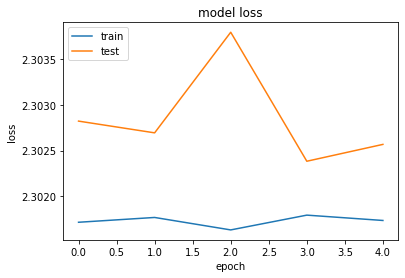

Test loss: 2.301436227416992
Test accuracy: 0.1135


In [148]:
performance = evaluate(model, epochs=5)

Output:
- Results: Test accuracy of 0.1135 after about 200 epochs
- Changes in results: None
- Reasoning: Gradients are vanishing when model is too deep

#### Hypothesis: Hyperparameter optimization around the batch size may improve performance
Description: As we observed improved test accuracy by choosing a batch size 64, we might obtain even better performance for another value smaller than 128.

Input:
- Number of nodes per layer: 128
- Number of hidden layers: 3
- Batch sizes: 32, 48, 80, 92
- Data set: centered around zero
- Output change: The test accuracy should improve compared to test accuracy obtained with the same architecture and batch size 64 (0.9702)
- Change reason: The right batch size allows for faster convergence & better generalisation while not increasing training time more than necessary.

Model: "model_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_82 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_81 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_725 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_726 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_727 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_728 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
____________________________________________________

54000/54000 [==============================] - 8s 145us/sample - loss: 0.2063 - acc: 0.9407 - val_loss: 0.1733 - val_acc: 0.9535
Epoch 51/160
54000/54000 [==============================] - 8s 145us/sample - loss: 0.2021 - acc: 0.9416 - val_loss: 0.1699 - val_acc: 0.9535
Epoch 52/160
54000/54000 [==============================] - 7s 138us/sample - loss: 0.1984 - acc: 0.9426 - val_loss: 0.1672 - val_acc: 0.9540
Epoch 53/160
54000/54000 [==============================] - 7s 131us/sample - loss: 0.1949 - acc: 0.9438 - val_loss: 0.1653 - val_acc: 0.9558
Epoch 54/160
54000/54000 [==============================] - 7s 133us/sample - loss: 0.1910 - acc: 0.9450 - val_loss: 0.1621 - val_acc: 0.9560
Epoch 55/160
54000/54000 [==============================] - 7s 138us/sample - loss: 0.1877 - acc: 0.9462 - val_loss: 0.1583 - val_acc: 0.9555
Epoch 56/160
54000/54000 [==============================] - 7s 132us/sample - loss: 0.1842 - acc: 0.9473 - val_loss: 0.1556 - val_acc: 0.9577
Epoch 57/160
54000/

Epoch 108/160
54000/54000 [==============================] - 9s 158us/sample - loss: 0.0870 - acc: 0.9753 - val_loss: 0.0973 - val_acc: 0.9723
Epoch 109/160
54000/54000 [==============================] - 9s 158us/sample - loss: 0.0859 - acc: 0.9765 - val_loss: 0.1008 - val_acc: 0.9712
Epoch 110/160
54000/54000 [==============================] - 8s 154us/sample - loss: 0.0848 - acc: 0.9765 - val_loss: 0.0957 - val_acc: 0.9730
Epoch 111/160
54000/54000 [==============================] - 8s 155us/sample - loss: 0.0837 - acc: 0.9769 - val_loss: 0.0952 - val_acc: 0.9738
Epoch 112/160
54000/54000 [==============================] - 9s 158us/sample - loss: 0.0829 - acc: 0.9770 - val_loss: 0.0945 - val_acc: 0.9738
Epoch 113/160
54000/54000 [==============================] - 7s 132us/sample - loss: 0.0822 - acc: 0.9771 - val_loss: 0.0940 - val_acc: 0.9750
Epoch 114/160
54000/54000 [==============================] - 8s 144us/sample - loss: 0.0811 - acc: 0.9777 - val_loss: 0.0929 - val_acc: 0.9742

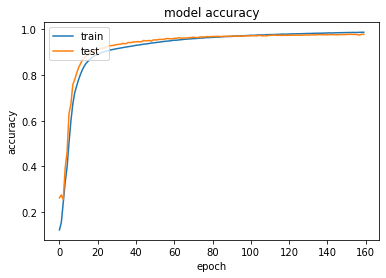

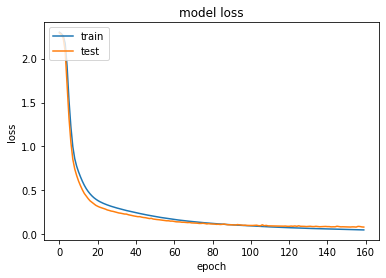

Test loss: 0.09064040261823685
Test accuracy: 0.9731
Model: "model_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_83 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_82 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_729 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_730 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_731 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_732 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0

54000/54000 [==============================] - 6s 103us/sample - loss: 0.2808 - acc: 0.9197 - val_loss: 0.2327 - val_acc: 0.9353
Epoch 51/160
54000/54000 [==============================] - 5s 101us/sample - loss: 0.2763 - acc: 0.9211 - val_loss: 0.2283 - val_acc: 0.9342
Epoch 52/160
54000/54000 [==============================] - 5s 99us/sample - loss: 0.2721 - acc: 0.9224 - val_loss: 0.2251 - val_acc: 0.9380
Epoch 53/160
54000/54000 [==============================] - 6s 104us/sample - loss: 0.2678 - acc: 0.9237 - val_loss: 0.2216 - val_acc: 0.9390
Epoch 54/160
54000/54000 [==============================] - 6s 105us/sample - loss: 0.2638 - acc: 0.9255 - val_loss: 0.2176 - val_acc: 0.9385
Epoch 55/160
54000/54000 [==============================] - 6s 109us/sample - loss: 0.2596 - acc: 0.9261 - val_loss: 0.2163 - val_acc: 0.9405
Epoch 56/160
54000/54000 [==============================] - 6s 107us/sample - loss: 0.2557 - acc: 0.9272 - val_loss: 0.2119 - val_acc: 0.9412
Epoch 57/160
54000/5

Epoch 108/160
54000/54000 [==============================] - 5s 99us/sample - loss: 0.1283 - acc: 0.9636 - val_loss: 0.1149 - val_acc: 0.9682
Epoch 109/160
54000/54000 [==============================] - 5s 101us/sample - loss: 0.1267 - acc: 0.9638 - val_loss: 0.1170 - val_acc: 0.9675
Epoch 110/160
54000/54000 [==============================] - 5s 97us/sample - loss: 0.1255 - acc: 0.9640 - val_loss: 0.1145 - val_acc: 0.9682
Epoch 111/160
54000/54000 [==============================] - 5s 100us/sample - loss: 0.1242 - acc: 0.9650 - val_loss: 0.1134 - val_acc: 0.9677
Epoch 112/160
54000/54000 [==============================] - 5s 101us/sample - loss: 0.1230 - acc: 0.9652 - val_loss: 0.1122 - val_acc: 0.9695
Epoch 113/160
54000/54000 [==============================] - 5s 90us/sample - loss: 0.1215 - acc: 0.9654 - val_loss: 0.1116 - val_acc: 0.9678
Epoch 114/160
54000/54000 [==============================] - 5s 99us/sample - loss: 0.1205 - acc: 0.9656 - val_loss: 0.1137 - val_acc: 0.9683
Epo

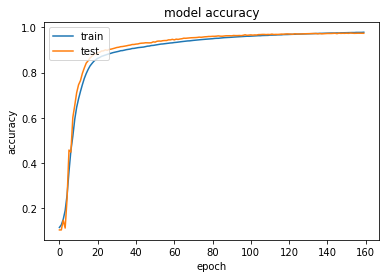

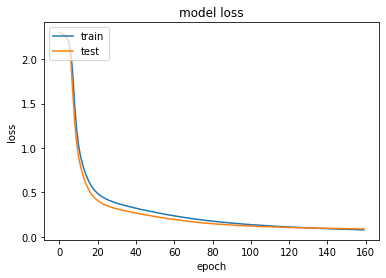

Test loss: 0.10524139365144074
Test accuracy: 0.9686
Model: "model_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_84 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_83 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_733 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_734 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_735 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_736 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0

54000/54000 [==============================] - 5s 86us/sample - loss: 0.4078 - acc: 0.8856 - val_loss: 0.3410 - val_acc: 0.9065
Epoch 51/160
54000/54000 [==============================] - 4s 74us/sample - loss: 0.4014 - acc: 0.8872 - val_loss: 0.3367 - val_acc: 0.9053
Epoch 52/160
54000/54000 [==============================] - 4s 66us/sample - loss: 0.3953 - acc: 0.8891 - val_loss: 0.3303 - val_acc: 0.9088
Epoch 53/160
54000/54000 [==============================] - 4s 78us/sample - loss: 0.3894 - acc: 0.8911 - val_loss: 0.3251 - val_acc: 0.9088
Epoch 54/160
54000/54000 [==============================] - 4s 76us/sample - loss: 0.3837 - acc: 0.8924 - val_loss: 0.3205 - val_acc: 0.9103
Epoch 55/160
54000/54000 [==============================] - 4s 75us/sample - loss: 0.3783 - acc: 0.8933 - val_loss: 0.3155 - val_acc: 0.9120
Epoch 56/160
54000/54000 [==============================] - 4s 74us/sample - loss: 0.3731 - acc: 0.8953 - val_loss: 0.3114 - val_acc: 0.9132
Epoch 57/160
54000/54000 [

54000/54000 [==============================] - 4s 71us/sample - loss: 0.2318 - acc: 0.9333 - val_loss: 0.1931 - val_acc: 0.9485
Epoch 109/160
54000/54000 [==============================] - 4s 70us/sample - loss: 0.2298 - acc: 0.9340 - val_loss: 0.1918 - val_acc: 0.9488
Epoch 110/160
54000/54000 [==============================] - 4s 71us/sample - loss: 0.2281 - acc: 0.9346 - val_loss: 0.1904 - val_acc: 0.9483
Epoch 111/160
54000/54000 [==============================] - 4s 71us/sample - loss: 0.2263 - acc: 0.9353 - val_loss: 0.1890 - val_acc: 0.9493
Epoch 112/160
54000/54000 [==============================] - 4s 70us/sample - loss: 0.2245 - acc: 0.9360 - val_loss: 0.1873 - val_acc: 0.9492
Epoch 113/160
54000/54000 [==============================] - 4s 70us/sample - loss: 0.2225 - acc: 0.9364 - val_loss: 0.1856 - val_acc: 0.9500
Epoch 114/160
54000/54000 [==============================] - 4s 69us/sample - loss: 0.2207 - acc: 0.9371 - val_loss: 0.1845 - val_acc: 0.9517
Epoch 115/160
54000/

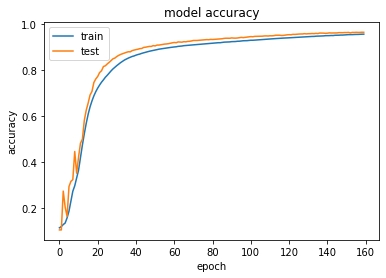

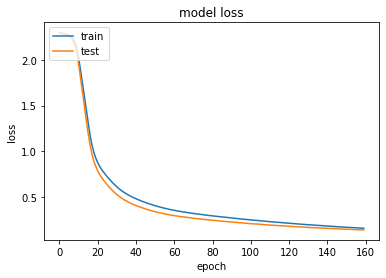

Test loss: 0.16229069089144468
Test accuracy: 0.9539
Model: "model_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_85 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_84 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_737 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_738 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_739 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_740 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0

54000/54000 [==============================] - 4s 65us/sample - loss: 0.4304 - acc: 0.8786 - val_loss: 0.3587 - val_acc: 0.9023
Epoch 51/160
54000/54000 [==============================] - 3s 63us/sample - loss: 0.4251 - acc: 0.8795 - val_loss: 0.3542 - val_acc: 0.9025
Epoch 52/160
54000/54000 [==============================] - 3s 64us/sample - loss: 0.4200 - acc: 0.8814 - val_loss: 0.3499 - val_acc: 0.9050
Epoch 53/160
54000/54000 [==============================] - 4s 66us/sample - loss: 0.4151 - acc: 0.8826 - val_loss: 0.3463 - val_acc: 0.9032
Epoch 54/160
54000/54000 [==============================] - 4s 68us/sample - loss: 0.4105 - acc: 0.8838 - val_loss: 0.3426 - val_acc: 0.9040
Epoch 55/160
54000/54000 [==============================] - 4s 65us/sample - loss: 0.4063 - acc: 0.8846 - val_loss: 0.3384 - val_acc: 0.9067
Epoch 56/160
54000/54000 [==============================] - 4s 66us/sample - loss: 0.4021 - acc: 0.8857 - val_loss: 0.3360 - val_acc: 0.9057
Epoch 57/160
54000/54000 [

54000/54000 [==============================] - 4s 70us/sample - loss: 0.2605 - acc: 0.9259 - val_loss: 0.2172 - val_acc: 0.9395
Epoch 109/160
54000/54000 [==============================] - 4s 72us/sample - loss: 0.2582 - acc: 0.9266 - val_loss: 0.2153 - val_acc: 0.9395
Epoch 110/160
54000/54000 [==============================] - 4s 70us/sample - loss: 0.2563 - acc: 0.9271 - val_loss: 0.2139 - val_acc: 0.9408
Epoch 111/160
54000/54000 [==============================] - 4s 70us/sample - loss: 0.2545 - acc: 0.9276 - val_loss: 0.2123 - val_acc: 0.9425
Epoch 112/160
54000/54000 [==============================] - 4s 68us/sample - loss: 0.2525 - acc: 0.9282 - val_loss: 0.2106 - val_acc: 0.9425
Epoch 113/160
54000/54000 [==============================] - 4s 69us/sample - loss: 0.2506 - acc: 0.9284 - val_loss: 0.2089 - val_acc: 0.9423
Epoch 114/160
54000/54000 [==============================] - 4s 69us/sample - loss: 0.2485 - acc: 0.9291 - val_loss: 0.2076 - val_acc: 0.9443
Epoch 115/160
54000/

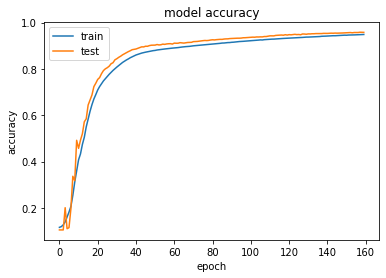

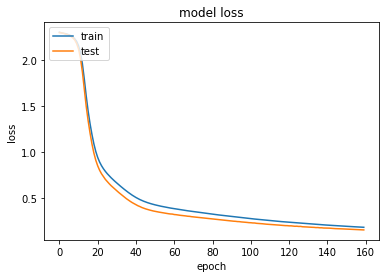

Test loss: 0.18603866226375104
Test accuracy: 0.9453


In [149]:
# parameter space
p = {
     'hidden_layers':  [3], #[1, 2, 3, 5, 10],
     'num_units': [128],  #[32, 48, 64, 92],
     'batch_size': [32, 48, 80, 92],
     'epochs': [100], #[5,10,100]
} 
# train and evaluate different models
for num_layers in p['hidden_layers']:
    for num_units in p['num_units']:
        for epochs in p['epochs']:
            epochs = 20 * num_layers + epochs  # allow deeper networks to train longer
            for batch_size in p['batch_size']:
                model = create_dense([num_units]*num_layers)
                performance = evaluate(model, epochs=epochs, batch_size=batch_size)
                performance['number of hidden units'] = num_units
                performance['number of hidden layers'] = num_layers
                performance['epochs'] = epochs
                performance['batch size'] = batch_size
                task_3_models.append(model)
                task_3_performances.append(performance)

In [153]:
# show model performance per number of nodes in table
pd.DataFrame(task_3_performances).sort_values(by=['test accuracy'], ascending=False)

,test loss,test accuracy,train loss,train accuracy,val loss,val accuracy,number of hidden units,number of hidden layers,epochs,batch size
1,0.090640,0.9731,0.049283,0.987167,0.081606,0.978167,128,3,160,32
2,0.105241,0.9686,0.079226,0.977796,0.091720,0.973167,128,3,160,48
0,0.111806,0.9676,0.093449,0.974074,0.100882,0.971000,128,3,200,64
3,0.162291,0.9539,0.153900,0.956278,0.135679,0.964333,128,3,160,80
4,0.186039,0.9453,0.181226,0.948333,0.152640,0.957500,128,3,160,92


Output:
- Results: Best test accuracy is reached at batch size 32 with 0.9731.
- Changes in results: Changes in results are almmost insignificant. Performance with batch size 64 was previously 0.9702 (without centered input data) and 0.9676 with centered input data.
- Reasoning: 64 was already the 'sweet spot' batch size, so further optimization around this hyperparameter did not help.

#### Hypothesis: Changing from sigmoid to relu should improve performance for deep neural net
Description: Changing the activation function can improve performance of deep neural networks

Input:
- Number of nodes per layer: 128
- Number of hidden layers: 3
- Batch size: 32, 48, 80, 92
- Data set: centered around zero
- Activation function: relu
- Output change: The test accuracy should improve compared to previous test accuracy 
- Change reason: Relu activation function is less prone to the vanishing gradient problem and doesn't saturate as easily as the sigmoid activation function. (https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

In [154]:
hidden_layer_activation = "relu"

Model: "model_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_87 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_86 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_745 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_746 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_747 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_748 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
____________________________________________________

54000/54000 [==============================] - 4s 77us/sample - loss: 0.0333 - acc: 0.9908 - val_loss: 0.0831 - val_acc: 0.9787
Epoch 51/110
54000/54000 [==============================] - 4s 74us/sample - loss: 0.0322 - acc: 0.9914 - val_loss: 0.0832 - val_acc: 0.9773
Epoch 52/110
54000/54000 [==============================] - 4s 72us/sample - loss: 0.0309 - acc: 0.9914 - val_loss: 0.0809 - val_acc: 0.9777
Epoch 53/110
54000/54000 [==============================] - 4s 73us/sample - loss: 0.0298 - acc: 0.9919 - val_loss: 0.0791 - val_acc: 0.9797
Epoch 54/110
54000/54000 [==============================] - 4s 75us/sample - loss: 0.0287 - acc: 0.9927 - val_loss: 0.0787 - val_acc: 0.9790
Epoch 55/110
54000/54000 [==============================] - 4s 75us/sample - loss: 0.0277 - acc: 0.9930 - val_loss: 0.0852 - val_acc: 0.9778
Epoch 56/110
54000/54000 [==============================] - 4s 80us/sample - loss: 0.0267 - acc: 0.9932 - val_loss: 0.0827 - val_acc: 0.9797
Epoch 57/110
54000/54000 [

54000/54000 [==============================] - 4s 73us/sample - loss: 0.0041 - acc: 0.9999 - val_loss: 0.0996 - val_acc: 0.9787
Epoch 109/110
54000/54000 [==============================] - 4s 72us/sample - loss: 0.0040 - acc: 0.9998 - val_loss: 0.0964 - val_acc: 0.9805
Epoch 110/110
54000/54000 [==============================] - 4s 74us/sample - loss: 0.0039 - acc: 0.9998 - val_loss: 0.0971 - val_acc: 0.9795
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


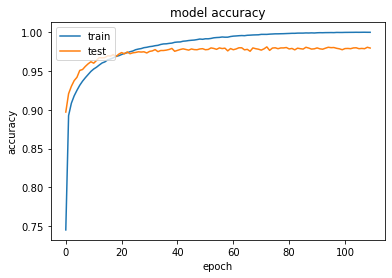

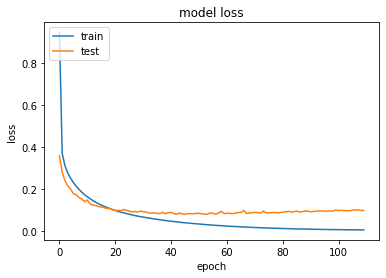

Test loss: 0.09106477778925255
Test accuracy: 0.9768


In [156]:
# parameter space
p = {
     'hidden_layers':  [3], #[1, 2, 3, 5, 10],
     'num_units': [128],  #[32, 48, 64, 92],
     'batch_size': [64],
     'epochs': [50], #[5,10,100]
} 
# train and evaluate different models
for num_layers in p['hidden_layers']:
    for num_units in p['num_units']:
        for epochs in p['epochs']:
            epochs = 20 * num_layers + epochs  # allow deeper networks to train longer
            for batch_size in p['batch_size']:
                model = create_dense([num_units]*num_layers)
                performance = evaluate(model, epochs=epochs, batch_size=batch_size)
                performance['number of hidden units'] = num_units
                performance['number of hidden layers'] = num_layers
                performance['epochs'] = epochs
                performance['batch size'] = batch_size
                task_3_models.append(model)
                task_3_performances.append(performance)

Observation: It looks like with relu the network is more prone to overfitting. 
Hypothesis: Early stopping could be a mitigation.

Model: "model_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_89 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_88 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_753 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_754 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_755 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_756 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
____________________________________________________

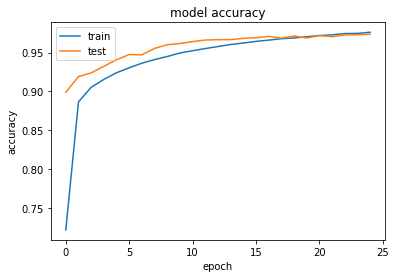

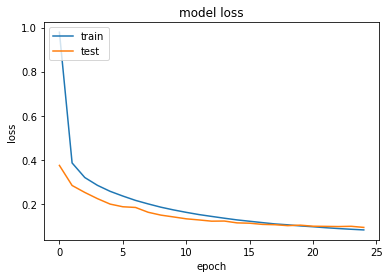

Test loss: 0.10569092444293202
Test accuracy: 0.9675


In [158]:
# parameter space
p = {
     'hidden_layers':  [3], #[1, 2, 3, 5, 10],
     'num_units': [128],  #[32, 48, 64, 92],
     'batch_size': [64],
     'epochs': [25], #[5,10,100]
} 
# train and evaluate different models
for num_layers in p['hidden_layers']:
    for num_units in p['num_units']:
        for epochs in p['epochs']:
            for batch_size in p['batch_size']:
                model = create_dense([num_units]*num_layers)
                performance = evaluate(model, epochs=epochs, batch_size=batch_size)
                performance['number of hidden units'] = num_units
                performance['number of hidden layers'] = num_layers
                performance['epochs'] = epochs
                performance['batch size'] = batch_size
                task_3_models.append(model)
                task_3_performances.append(performance)

Output:
- Results: Test accuracy of 0.9768 after epoch 110, test accuracy of 0.9675 after epoch 25.
- Changes in results: Test accuracy is not really higher than previous test accuracy. But training is faster as less epochs are needed to obtain this test accuracy.
- Reasoning: Relu is faster to optimize as activation function does not suffer as much from vanishing gradients and saturation of activation units.

### Task 5: Discuss the results for Tasks 1-4 with your project partner. 
Note down the differences in the results between Part 1 and 2 so far and document your insights. 
Does one architecture work better than the other? Why? Would the optimization from Tasks 3 and 4 help improve both Part 1 and Part 2 results.